# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>💗🫀 Heart Disease<span style="color: #000000"> EDA & Prediction 🔮</span></b><br><span style="color: #FF5C8A; font-size: 24px">with Various Machine Learning Models </span></h1>
<hr>
​

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>

<center>
    <img src="https://cdn.dribbble.com/users/2154580/screenshots/6452241/atemlos_loop_heart_v1.0_chriseff_dribbble.gif" alt="Heart Disease" width="80%">
</center>

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix , roc_curve
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
import plotly.graph_objects as go 
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Color Palettes 🎨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will create some <b>color palettes</b> that will be used in this notebook.
</div>

In [95]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>


In [96]:
df = pd.read_csv("heart.csv")
df.head().style.background_gradient(cmap = 'Reds').set_properties(**{'font-family'  : 'Segoe UI'})

In [97]:
# --- Print Dataset Info ---
print('\033[1m '+' .: Dataset Info :. '+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m',df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m',df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage= False)

  .: Dataset Info :. 
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>14 columns</b></mark> with <mark><b>303 observations</b></mark>. Also, there are <mark><b>no null values</b></mark> in this dataset. The <b>details of each variables</b> also can be seen above.<br>
    👉 However, the <mark><b>data types for some columns are not matched</b></mark>. Below will <mark><b>fixed the data types for those column</b></mark> before analysis performed.

In [98]:
# --- Fix Data Types
lst = ['sex','cp','fbs','restecg','exang','slope','ca','thal'] # categorical features
df[lst] = df[lst].astype(object)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Initial Data Exploration 🔍</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before applying ML models.

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  sex (Gender)</div>

*************************
Sex (Gender) Total :.
*************************


sex
1    713
0    312
Name: count, dtype: int64

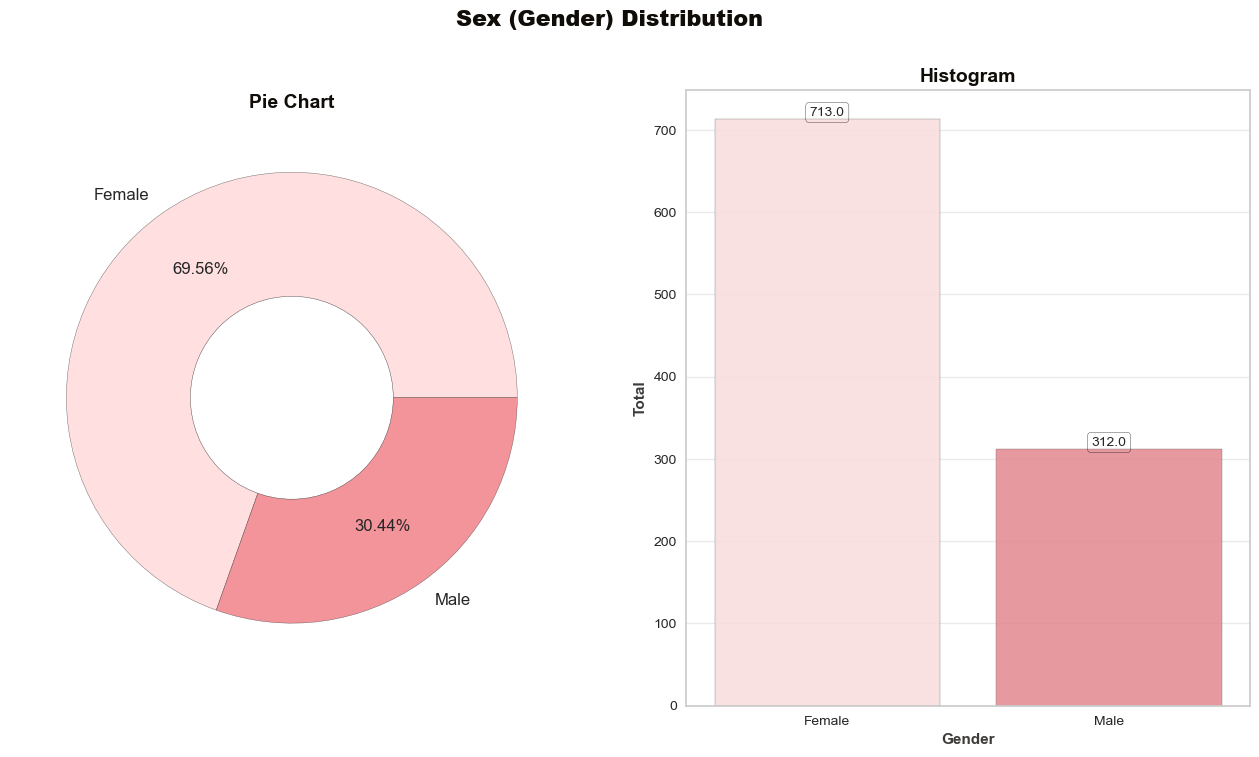

In [99]:
# Settings Colors, Labels, Order
colors = color_mix[2:4]
labels = ['Female', 'Male']
order = df['sex'].value_counts().index

# -- Size for Both Figures
plt.figure(figsize=(16,8))
plt.suptitle('Sex (Gender) Distribution', fontweight = 'heavy',
             fontsize = '16', fontfamily = 'sans-serif', color = black_grad[0])


# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif' , color = black_grad[0])
plt.pie(df['sex'].value_counts(), labels = labels, colors = colors, pctdistance = 0.7,
        autopct='%.2f%%', wedgeprops = dict(alpha=0.8,edgecolor=black_grad[1]), 
        textprops = {'fontsize' : 12})
centre = plt.Circle((0,0),0.45, fc = 'white', edgecolor = black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1,2,2)
plt.title('Histogram', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'sex', data = df, palette = colors, order = order , 
                   edgecolor = black_grad[2], alpha = 0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width() / 2, 
             rect.get_height() + 4.25, rect.get_height(),
             horizontalalignment = 'center' , fontsize = 10, 
             bbox = dict(facecolor = 'none', edgecolor = black_grad[0],
                         linewidth = 0.25, boxstyle = 'round'))
    
plt.xlabel('Gender', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.ylabel('Total' , fontweight = 'bold' , fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.xticks([0,1], labels)
plt.grid(axis='y', alpha = 0.4)
countplt


print('*' * 25)
print('\033[1m'+'Sex (Gender) Total :.' + '\033[0m')
print('*' * 25)
df.sex.value_counts(dropna = False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  cp (Chest Pain Type)</div>

******************************
Chest Pain Type Total :.
******************************


cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

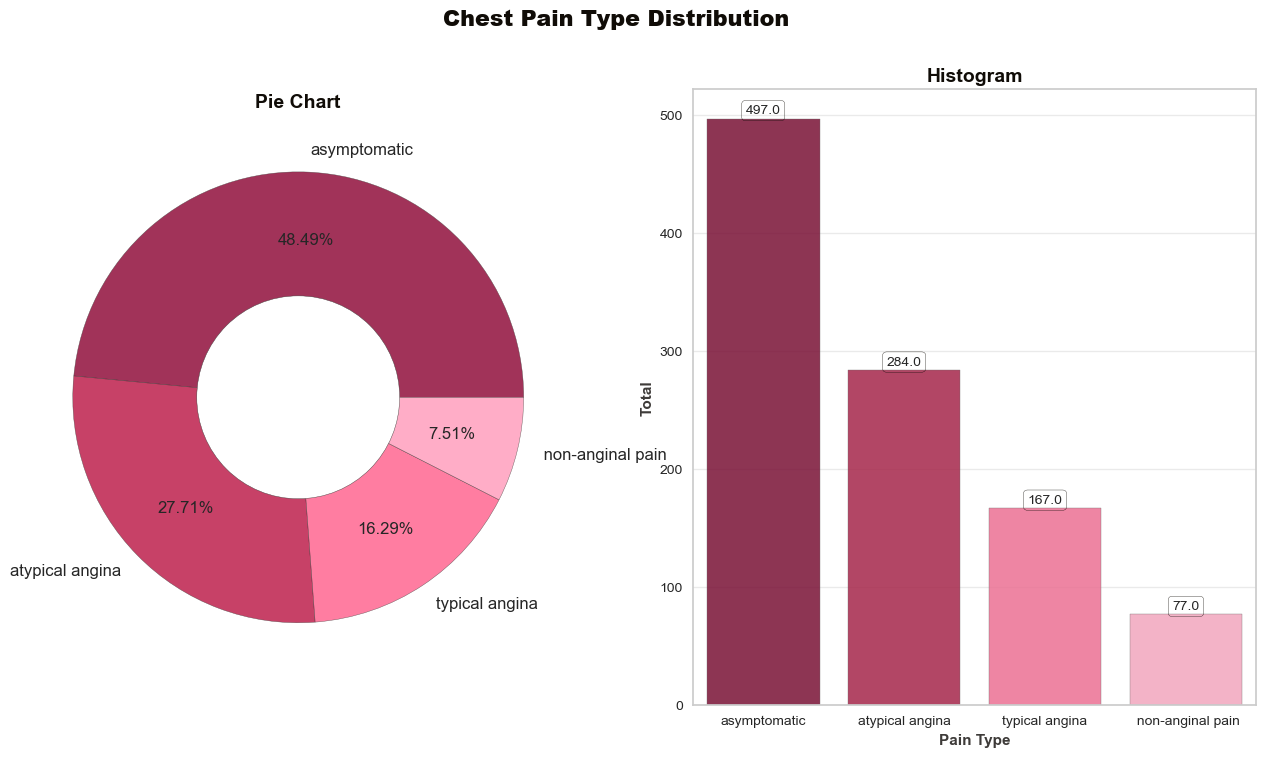

In [100]:
# Settings Colors, Labels, Order
colors = pink_grad[0:4]
labels = ['asymptomatic', 'atypical angina', 'typical angina', ' non-anginal pain']
order = df['cp'].value_counts().index

# -- Size for Both Figures
plt.figure(figsize=(16,8))
plt.suptitle('Chest Pain Type Distribution', fontweight = 'heavy',
             fontsize = '16', fontfamily = 'sans-serif', color = black_grad[0])


# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif' , color = black_grad[0])
plt.pie(df['cp'].value_counts(), labels = labels, colors = colors, pctdistance = 0.7,
        autopct='%.2f%%', wedgeprops = dict(alpha=0.8,edgecolor=black_grad[1]), 
        textprops = {'fontsize' : 12})
centre = plt.Circle((0,0),0.45, fc = 'white', edgecolor = black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1,2,2)
plt.title('Histogram', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'cp', data = df, palette = colors, order = order , 
                   edgecolor = black_grad[2], alpha = 0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width() / 2, 
             rect.get_height() + 4.25, rect.get_height(),
             horizontalalignment = 'center' , fontsize = 10, 
             bbox = dict(facecolor = 'none', edgecolor = black_grad[0],
                         linewidth = 0.25, boxstyle = 'round'))
    
plt.xlabel('Pain Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.ylabel('Total' , fontweight = 'bold' , fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.xticks([0,1,2,3], labels)
plt.grid(axis='y', alpha = 0.4)
countplt


print('*' * 30)
print('\033[1m'+'Chest Pain Type Total :.' + '\033[0m')
print('*' * 30)
df.cp.value_counts(dropna = False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> fbs (Fasting Blood Sugar)</div>

********************************
Fasting Blood Sugar Total :.
********************************


fbs
0    872
1    153
Name: count, dtype: int64

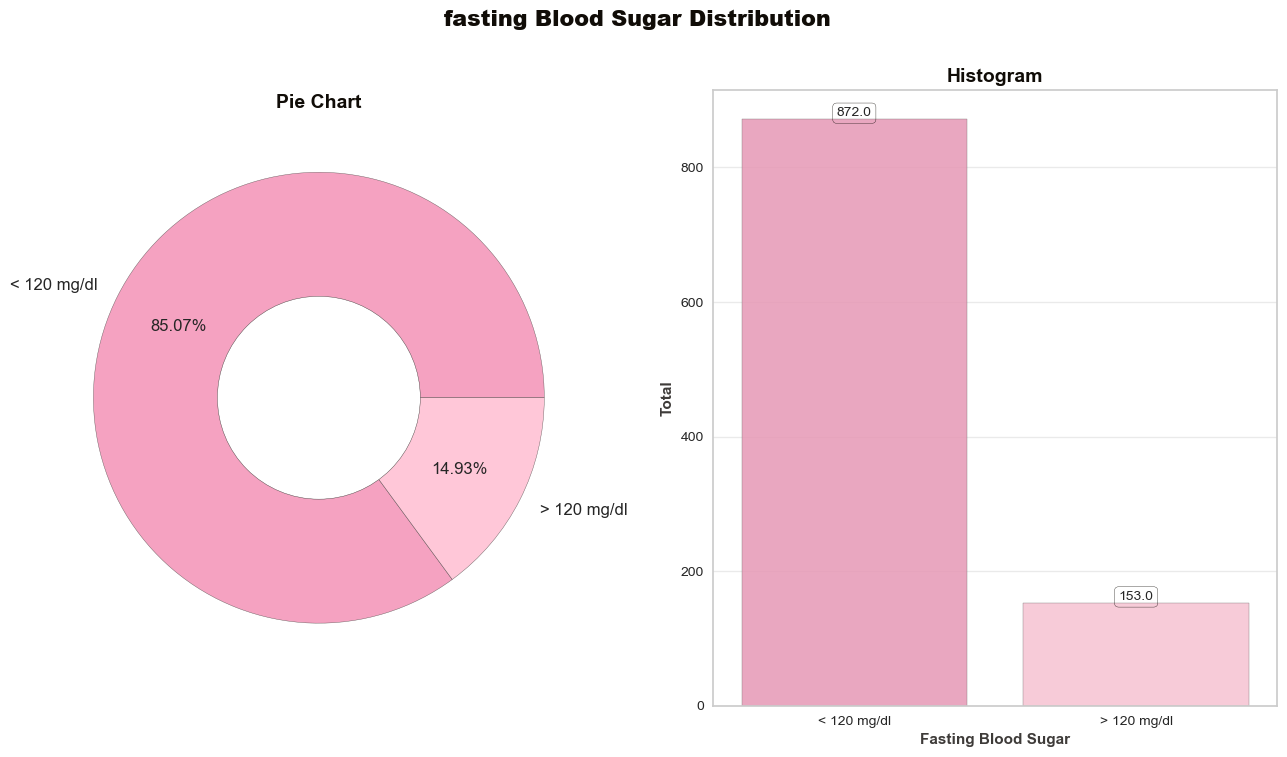

In [101]:
# Settings Colors, Labels, Order
colors = color_mix[0:2]
labels = ['< 120 mg/dl' , '> 120 mg/dl']
order = df['fbs'].value_counts().index

# -- Size for Both Figures
plt.figure(figsize=(16,8))
plt.suptitle('fasting Blood Sugar Distribution', fontweight = 'heavy',
             fontsize = '16', fontfamily = 'sans-serif', color = black_grad[0])


# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif' , color = black_grad[0])
plt.pie(df['fbs'].value_counts(), labels = labels, colors = colors, pctdistance = 0.7,
        autopct='%.2f%%', wedgeprops = dict(alpha=0.8,edgecolor=black_grad[1]), 
        textprops = {'fontsize' : 12})
centre = plt.Circle((0,0),0.45, fc = 'white', edgecolor = black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1,2,2)
plt.title('Histogram', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'fbs', data = df, palette = colors, order = order , 
                   edgecolor = black_grad[2], alpha = 0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width() / 2, 
             rect.get_height() + 4.25, rect.get_height(),
             horizontalalignment = 'center' , fontsize = 10, 
             bbox = dict(facecolor = 'none', edgecolor = black_grad[0],
                         linewidth = 0.25, boxstyle = 'round'))
    
plt.xlabel('Fasting Blood Sugar', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.ylabel('Total' , fontweight = 'bold' , fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.xticks([0,1], labels)
plt.grid(axis='y', alpha = 0.4)
countplt


print('*' * 32)
print('\033[1m'+'Fasting Blood Sugar Total :.' + '\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna = False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  restecg (Resting Electrocardiographic Results)</div>

**************************************************
Resting Electrocardiographic Results Total :.
**************************************************


restecg
1    513
0    497
2     15
Name: count, dtype: int64

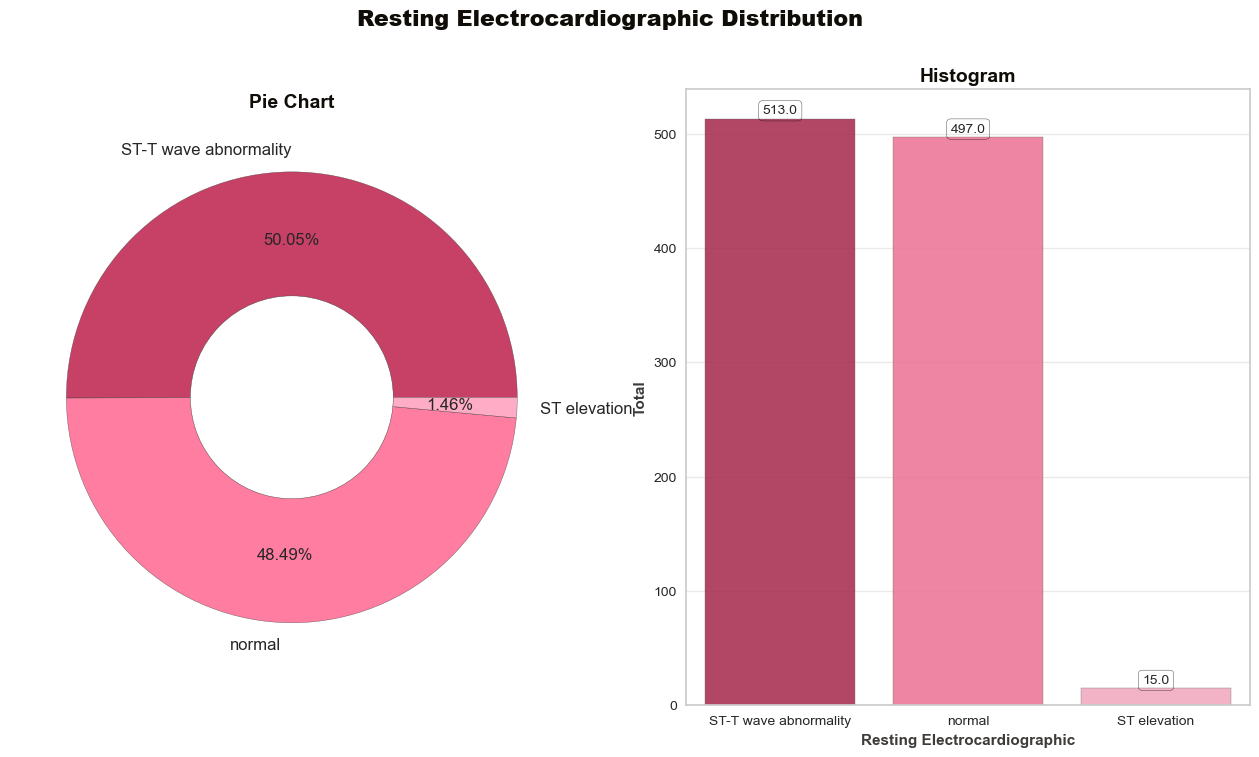

In [102]:
# Settings Colors, Labels, Order
colors = pink_grad[1:4]
labels = ['ST-T wave abnormality', 'normal', 'ST elevation']
order = df['restecg'].value_counts().index

# -- Size for Both Figures
plt.figure(figsize=(16,8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight = 'heavy',
             fontsize = '16', fontfamily = 'sans-serif', color = black_grad[0])


# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif' , color = black_grad[0])
plt.pie(df['restecg'].value_counts(), labels = labels, colors = colors, pctdistance = 0.7,
        autopct='%.2f%%', wedgeprops = dict(alpha=0.8,edgecolor=black_grad[1]), 
        textprops = {'fontsize' : 12})
centre = plt.Circle((0,0),0.45, fc = 'white', edgecolor = black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1,2,2)
plt.title('Histogram', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'restecg', data = df, palette = colors, order = order , 
                   edgecolor = black_grad[2], alpha = 0.85)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width() / 2, 
             rect.get_height() + 4.25, rect.get_height(),
             horizontalalignment = 'center' , fontsize = 10, 
             bbox = dict(facecolor = 'none', edgecolor = black_grad[0],
                         linewidth = 0.25, boxstyle = 'round'))
    
plt.xlabel('Resting Electrocardiographic', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.ylabel('Total' , fontweight = 'bold' , fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])
plt.xticks([0,1,2], labels)
plt.grid(axis='y', alpha = 0.4)
countplt


print('*' * 50)
print('\033[1m'+'Resting Electrocardiographic Results Total :.' + '\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna = False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  exang (Exercise Induced Angina)</div>

***********************************
.: Exercise Induced Angina Total :.
***********************************


exang
0    680
1    345
Name: count, dtype: int64

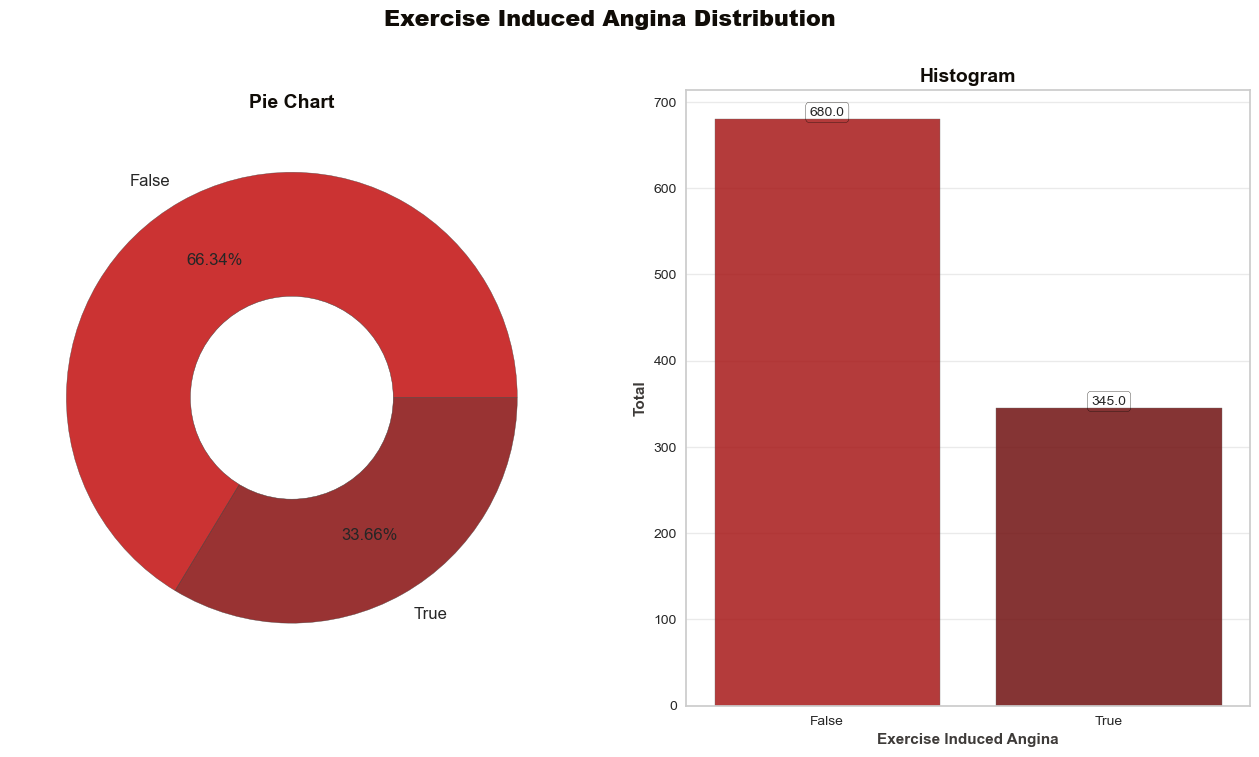

In [103]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  slope (Slope of the Peak Exercise)</div>

********************
.: Slope Total :.
********************


slope
1    482
2    469
0     74
Name: count, dtype: int64

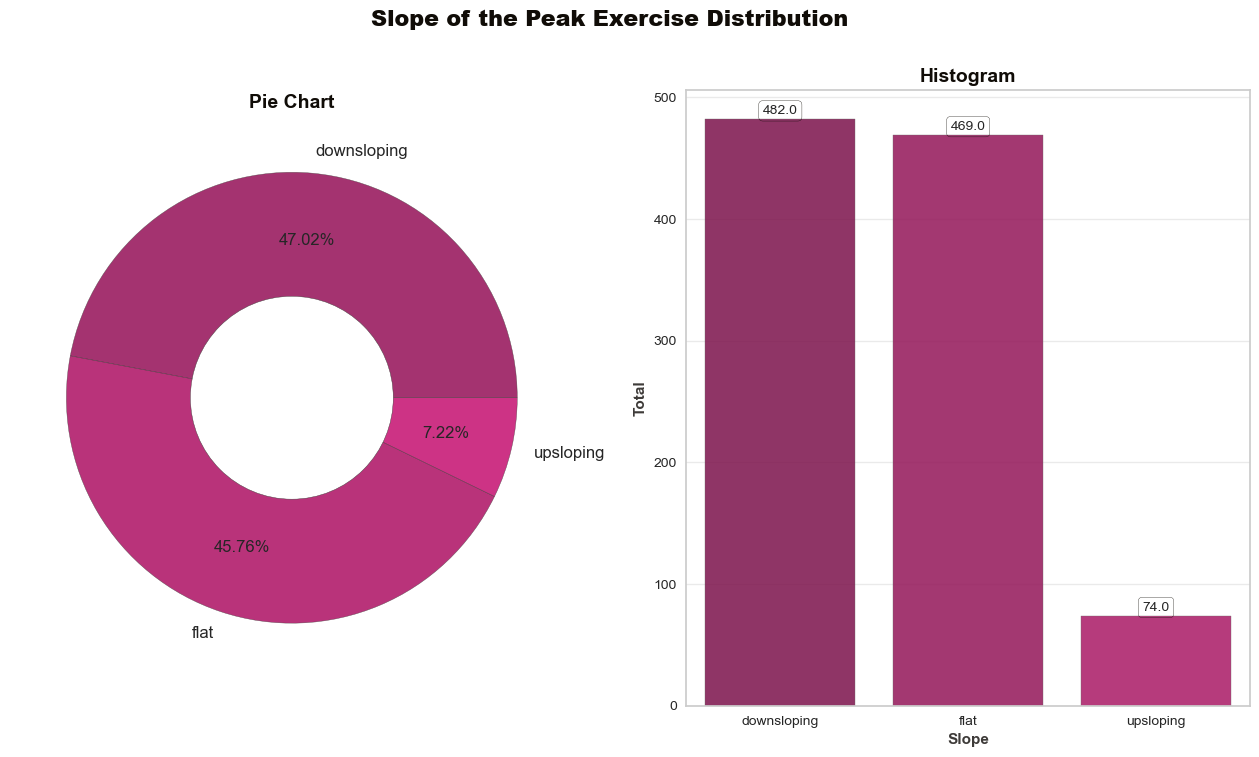

In [104]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['downsloping', 'flat', 'upsloping']
order=df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  ca (Number of Major Vessels)</div>

****************************************
.: Number of Major Vessels Total :.
****************************************


ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

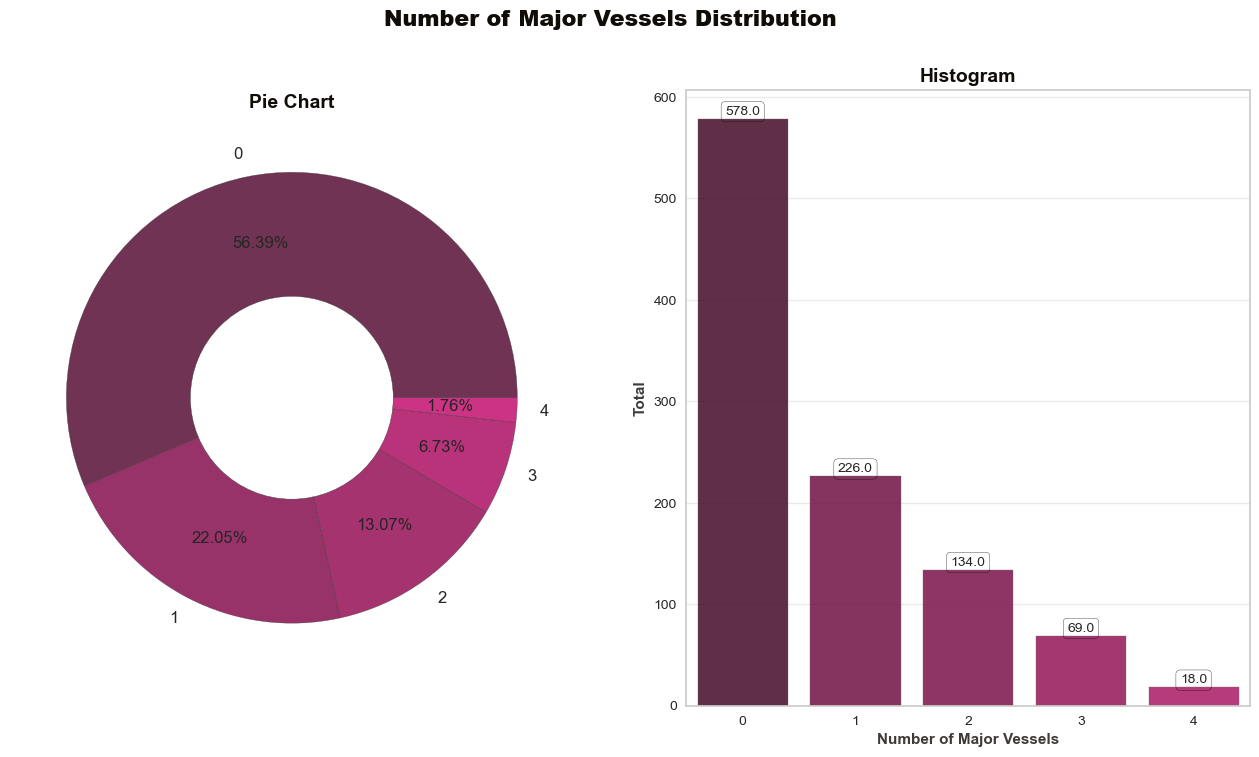

In [105]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2,3,4], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> thal</div>

********************
.: "thal" Total :.
********************


thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

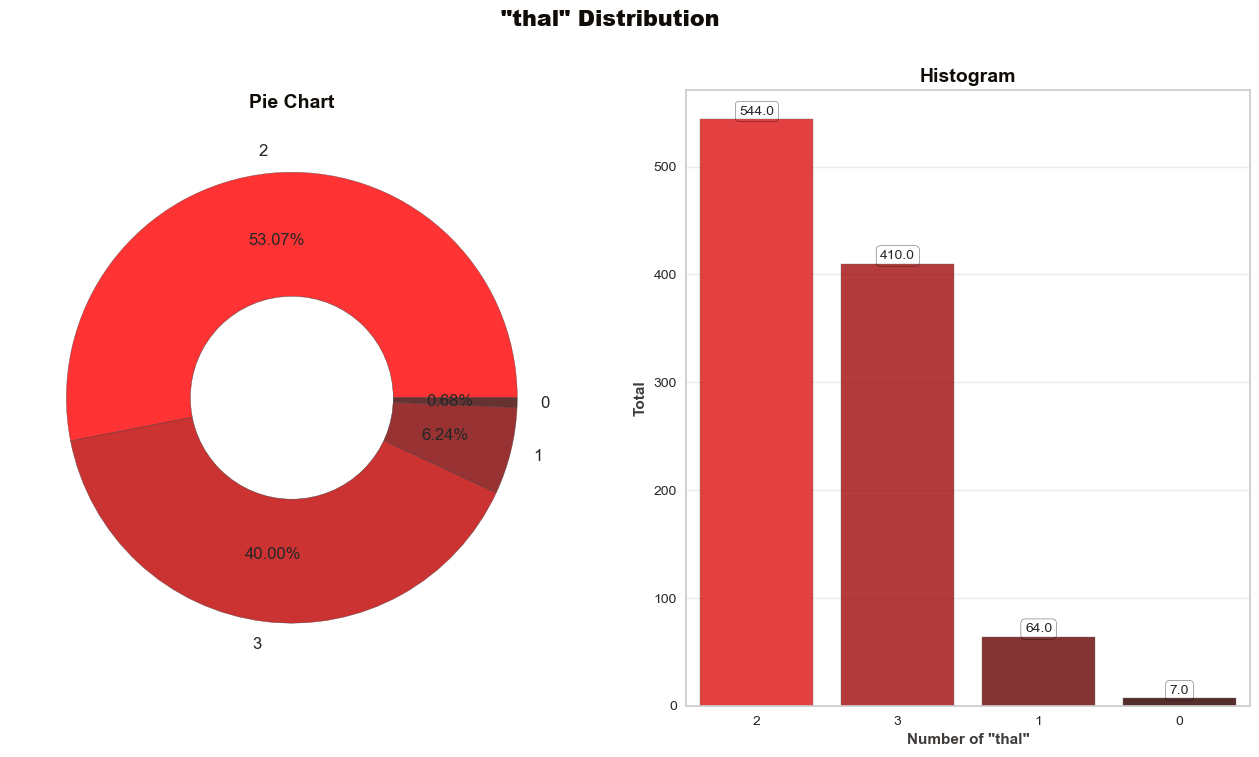

In [106]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1,2,3], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> target (Heart Diseases Status)</div>

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


target
1    526
0    499
Name: count, dtype: int64

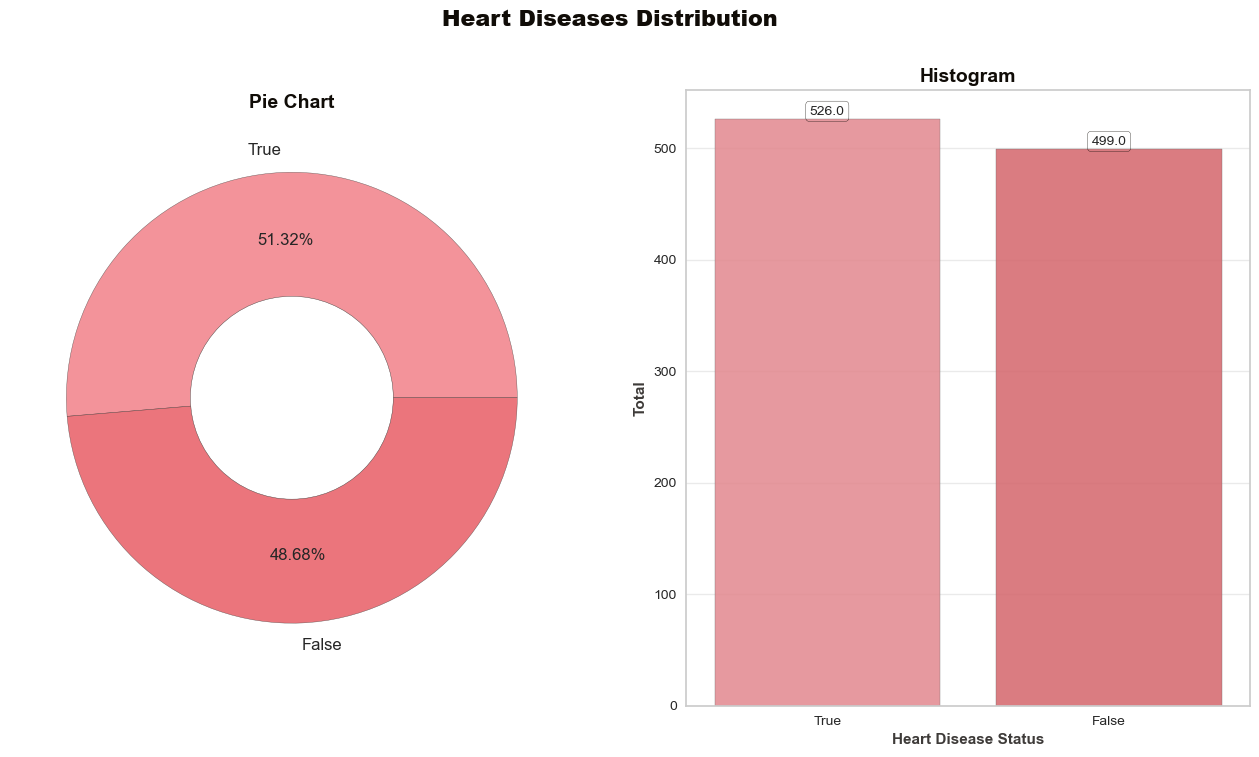

In [107]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

## <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Numerical Variable 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>numerical variable</b>.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Descriptive Statistics 📏</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>descriptive statistics</b> of numerical variables.
</div>

In [108]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude = 'object').describe().T.style.background_gradient(cmap = 'PuRd').set_properties(**{'font_family' : 'Segoe UI'})

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Continuous Column Distribution 📈</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show the <b>distribution of numerical variables</b> in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.

</div>

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




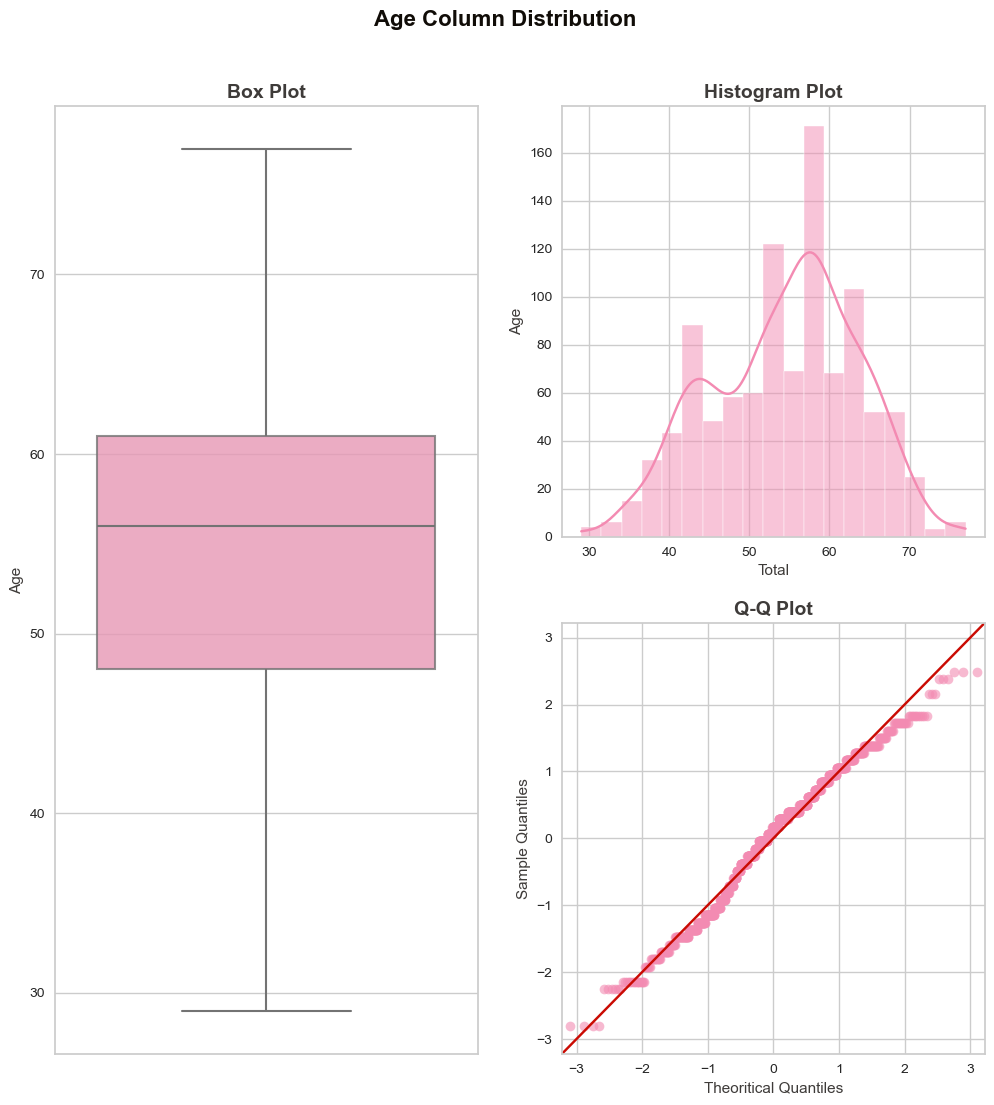

In [109]:
# --- Variable , Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig = plt.figure(figsize = (12,12))

# --- SSkewness & Kurtosis 
print('\033[1m' + '.: Age Column Skewness & Kurtosis :.' + '\033[0m')
print('*' * 40)
print('Skewness:' + '\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m' + 'Kurtosis:' + '\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')


# --- General Title
fig.suptitle('Age Column Distribution', fontweight = 'bold', fontsize = 16, 
             fontfamily = 'sans-serif', color = black_grad[0])
fig.subplots_adjust(top = 0.9)

# --- Histogram ---
ax_1 = fig.add_subplot(2,2,2)
plt.title('Histogram Plot', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[1])
sns.histplot(data = df,x = var , kde = True, color = color)
plt.xlabel('Total', fontweight = 'regular', fontsize = 11,
           fontfamily = 'sans-serif' , color = black_grad[1])
plt.ylabel('Age',fontweight = 'regular' , fontsize = 11, fontfamily = 'sans-serif',
           color = black_grad[1])


# --- Q-Q Plot ---
ax_2 = fig.add_subplot(2,2,4)
plt.title('Q-Q Plot' , fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif' , color = black_grad[1])
qqplot(df[var],fit = True, line = '45', ax = ax_2, markerfacecolor = color,
       markeredgecolor=color, alpha = 0.6)
plt.xlabel('Theoritical Quantiles', fontweight = 'regular' , fontsize = 11, 
           fontfamily = 'sans-serif' , color = black_grad[1])
plt.ylabel('Sample Quantiles', fontweight = 'regular', fontsize = 11,
           fontfamily = 'sans-serif' , color = black_grad[1])


# --- Box Plot ---
ax_3 = fig.add_subplot(1,2,1)
plt.title('Box Plot', fontweight = 'bold' ,fontsize = 14, 
          fontfamily = 'sans-serif' , color = black_grad[1] )
sns.boxplot(data = df, y = var, color = color , boxprops = dict(alpha = 0.8), linewidth = 1.5)
plt.ylabel('Age' , fontweight= 'regular' , fontsize = 11, fontfamily = 'sans-serif', 
           color = black_grad[1])
plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  trestbps (Resting Blood Pressure in mm Hg) </h4>

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.740
Kurtosis: 0.991




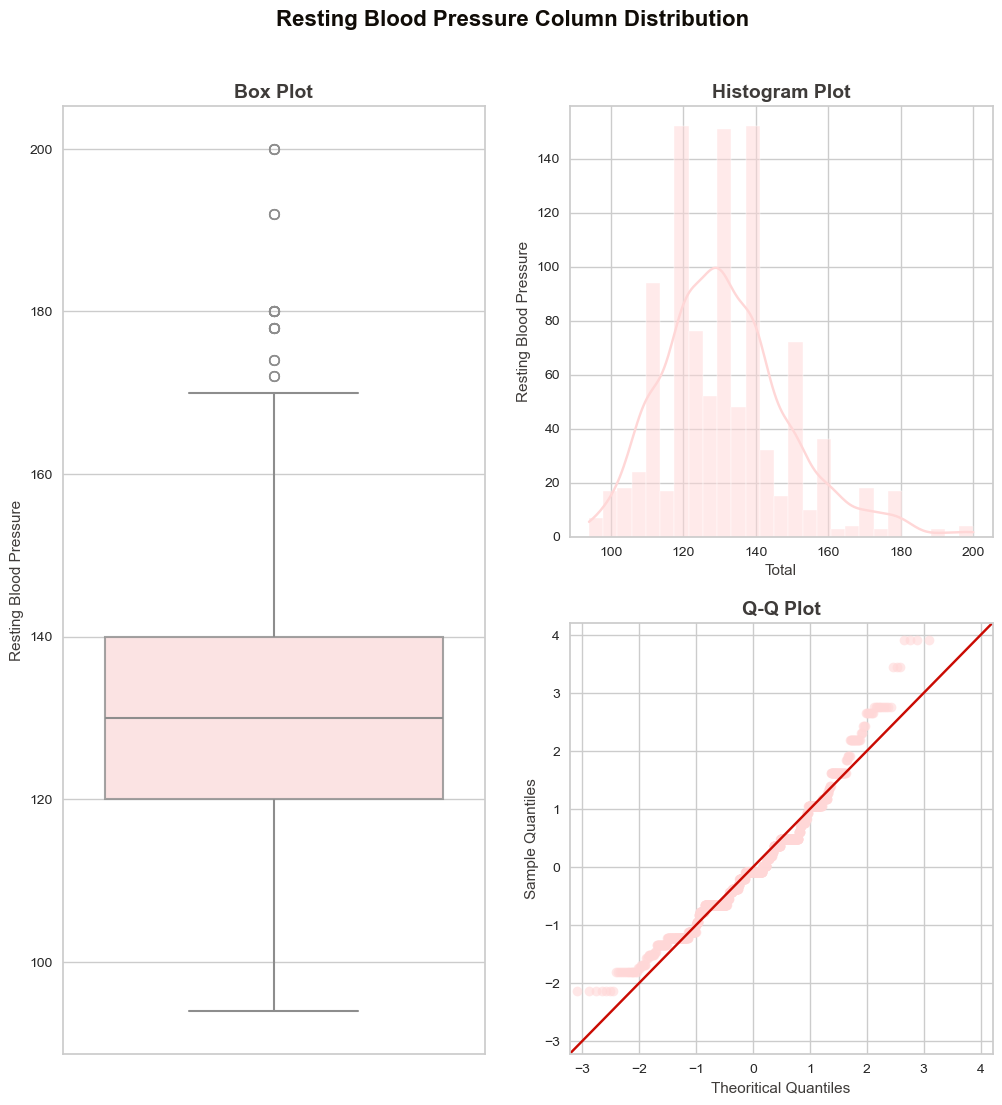

In [110]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  chol (Serum Cholestoral in mg/dl) </h4>

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




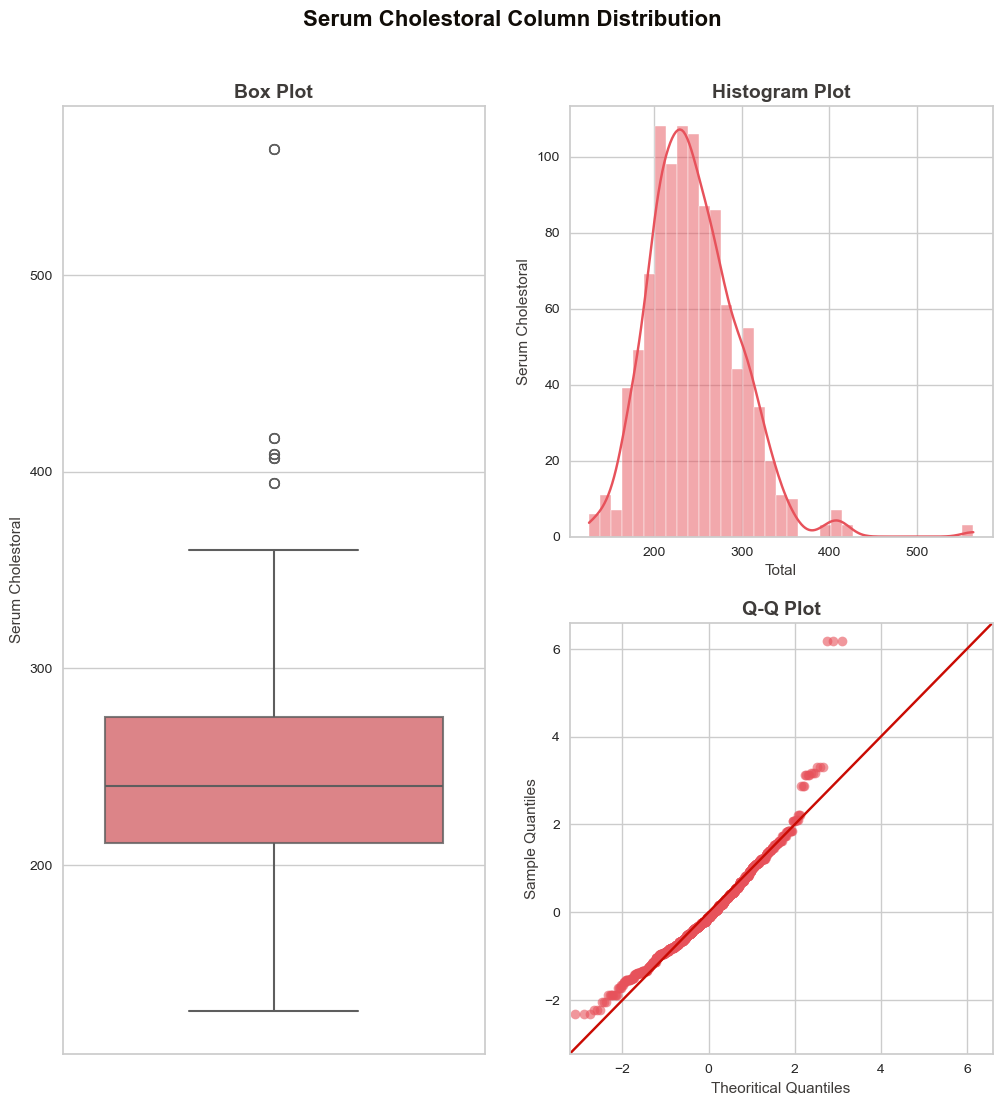

In [111]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  thalach (Maximum Heart Rate) </h4>

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089




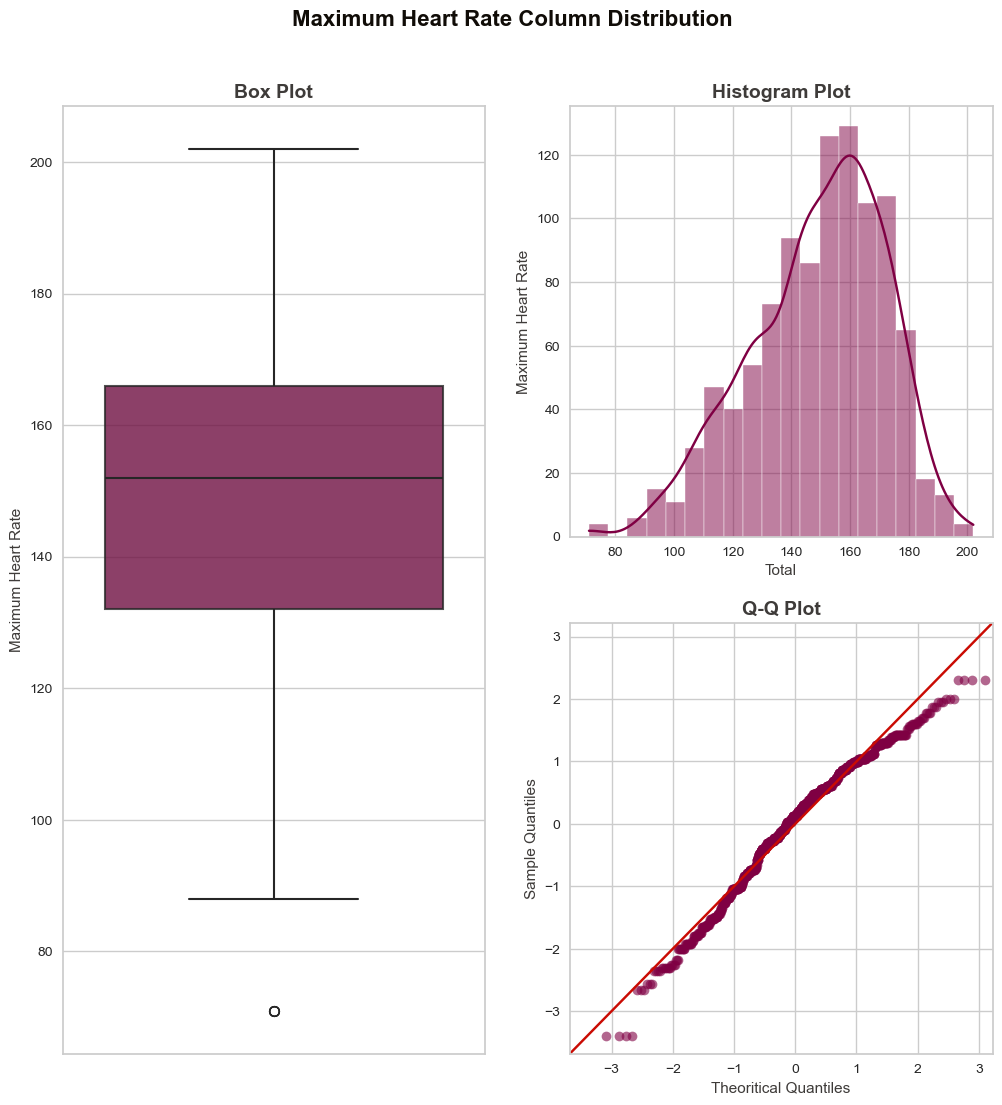

In [112]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> oldpeak </h4>

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.211
Kurtosis: 1.314




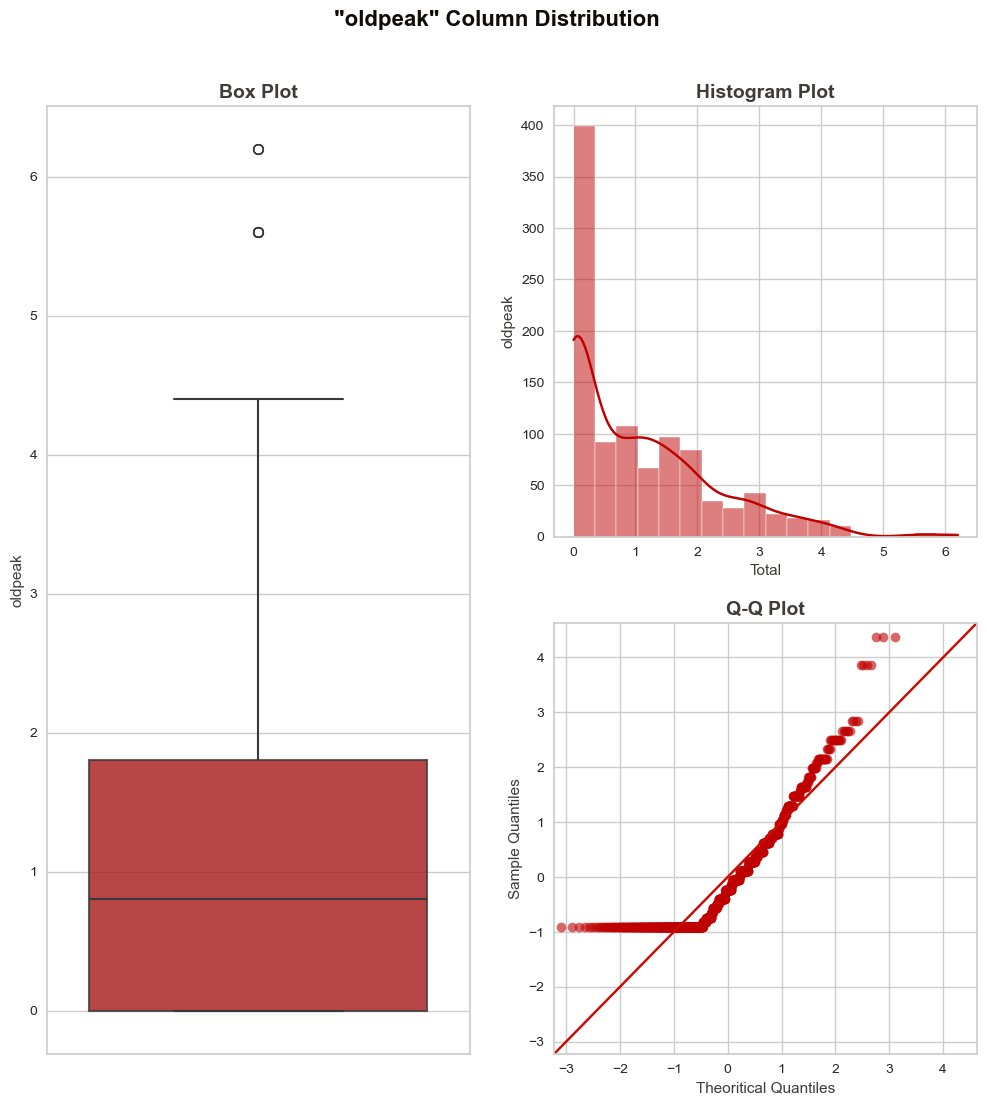

In [113]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> EDA 📉</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform some <b>EDA</b> to get more insights about dataset.

In [114]:
numerical_features = df[['age','trestbps','chol','thalach','oldpeak']]
numerical_features.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'})

In [115]:
categorical_features = df[['sex','cp','fbs', 'restecg','exang','slope', 'ca', 'thal']]

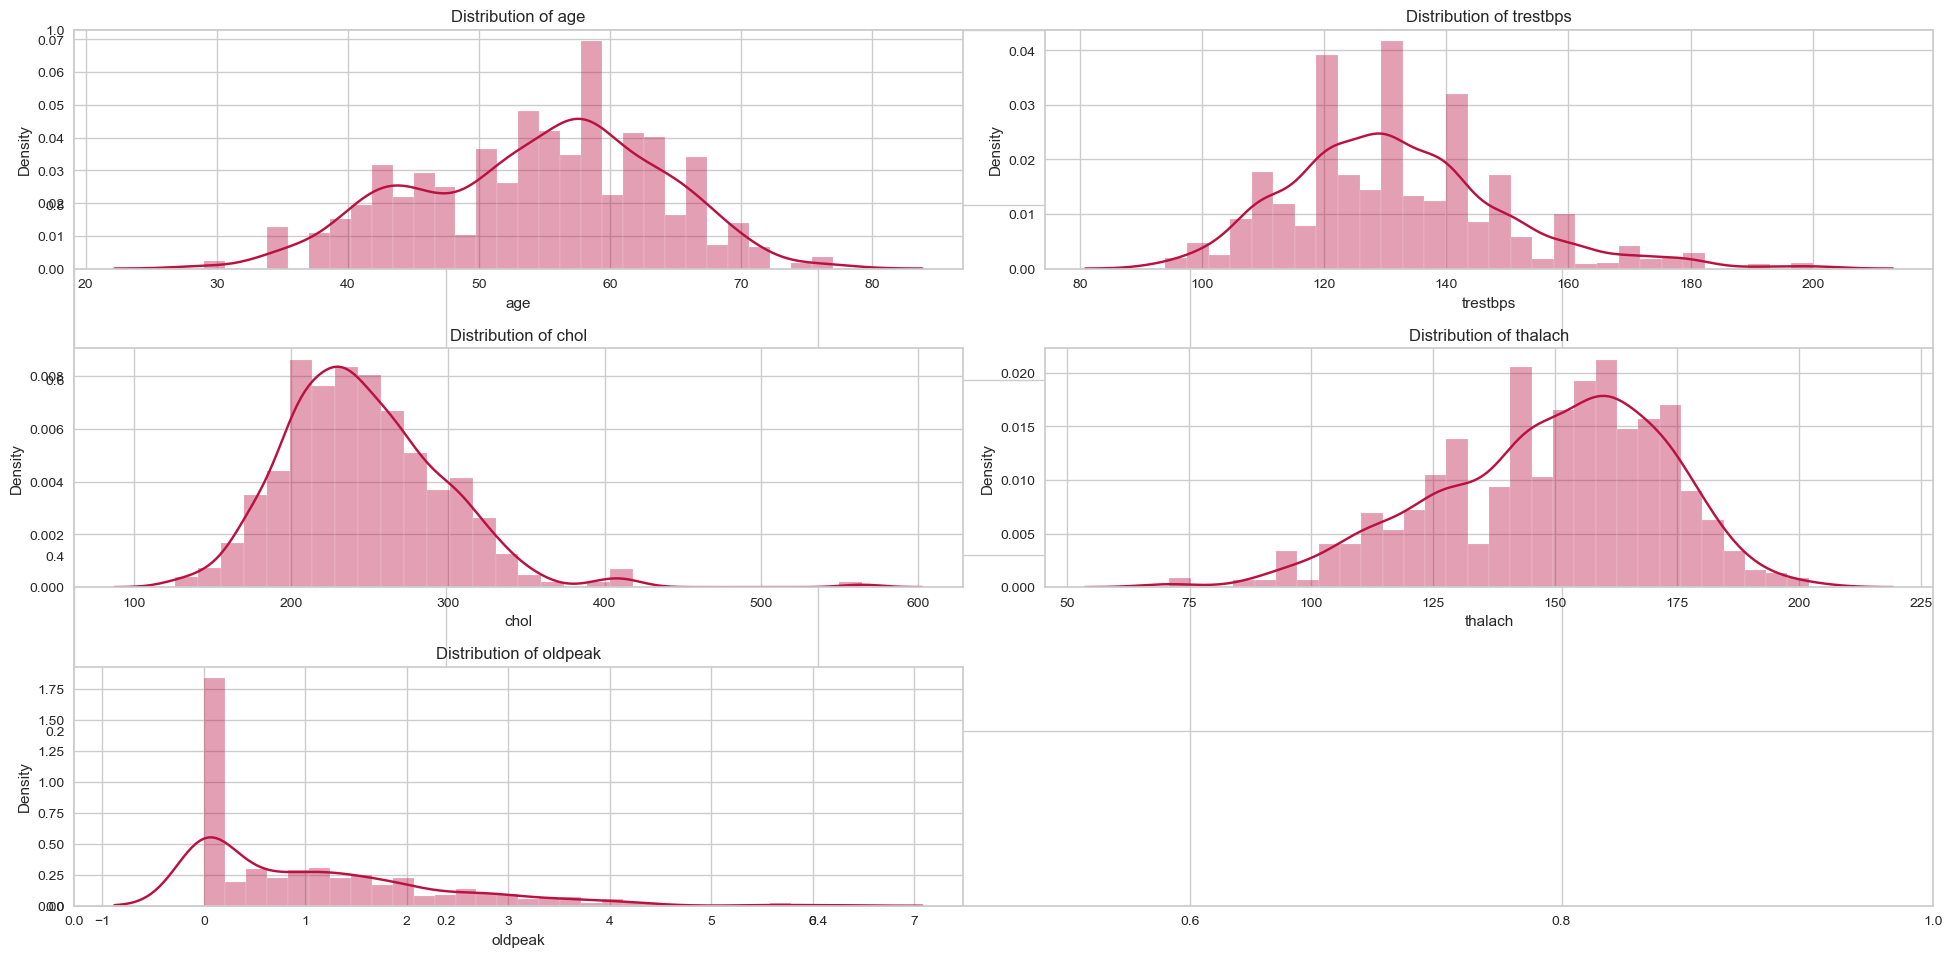

In [116]:
plt.subplots(figsize =(20,10))
for i, column in enumerate(numerical_features):
    plt.subplot(3,2,i+1)
    sns.distplot(df[column],bins = 30, color = pink_grad[1])
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

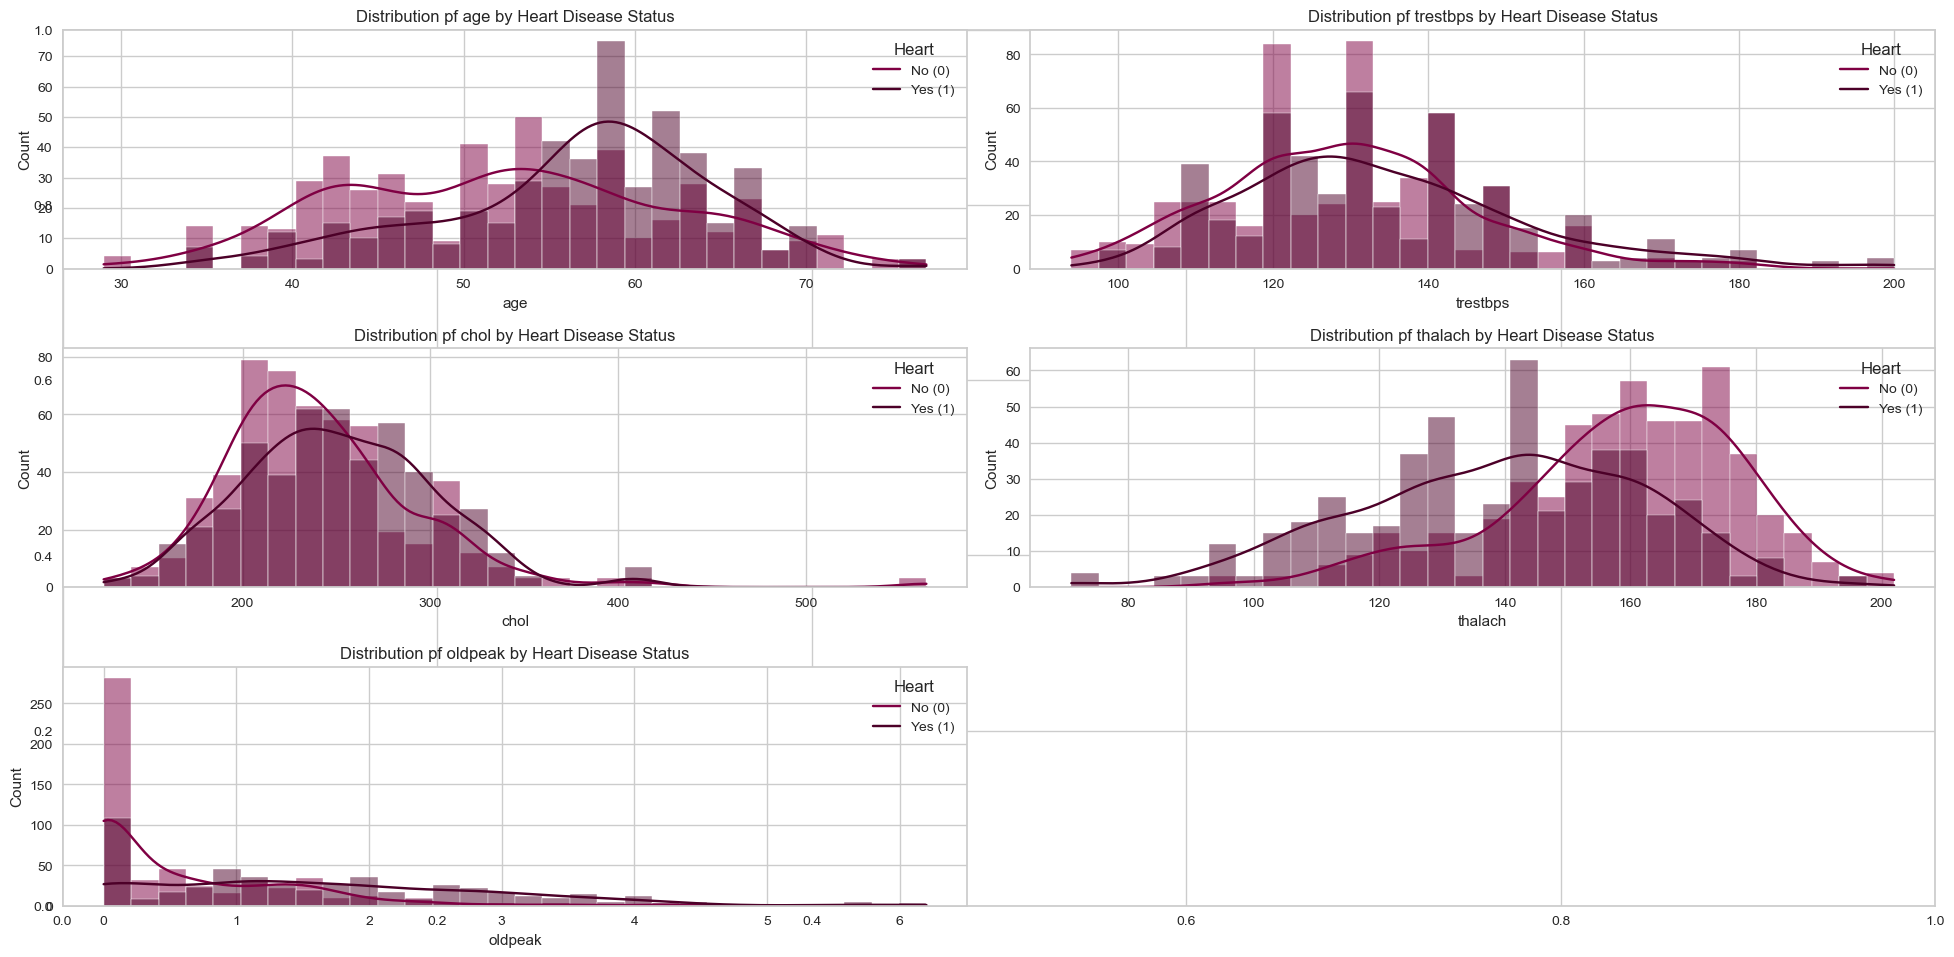

In [117]:
plt.subplots(figsize=(20,10))
for i,column in enumerate(numerical_features):
    plt.subplot(3,2,i+1)
    sns.histplot(data = df, x = column, hue = 'target', kde = True, palette = purple_grad[0:2],bins = 30)
    plt.title(f"Distribution pf {column} by Heart Disease Status")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title = "Heart", labels = ["No (0)","Yes (1)"])

plt.tight_layout()
plt.show()

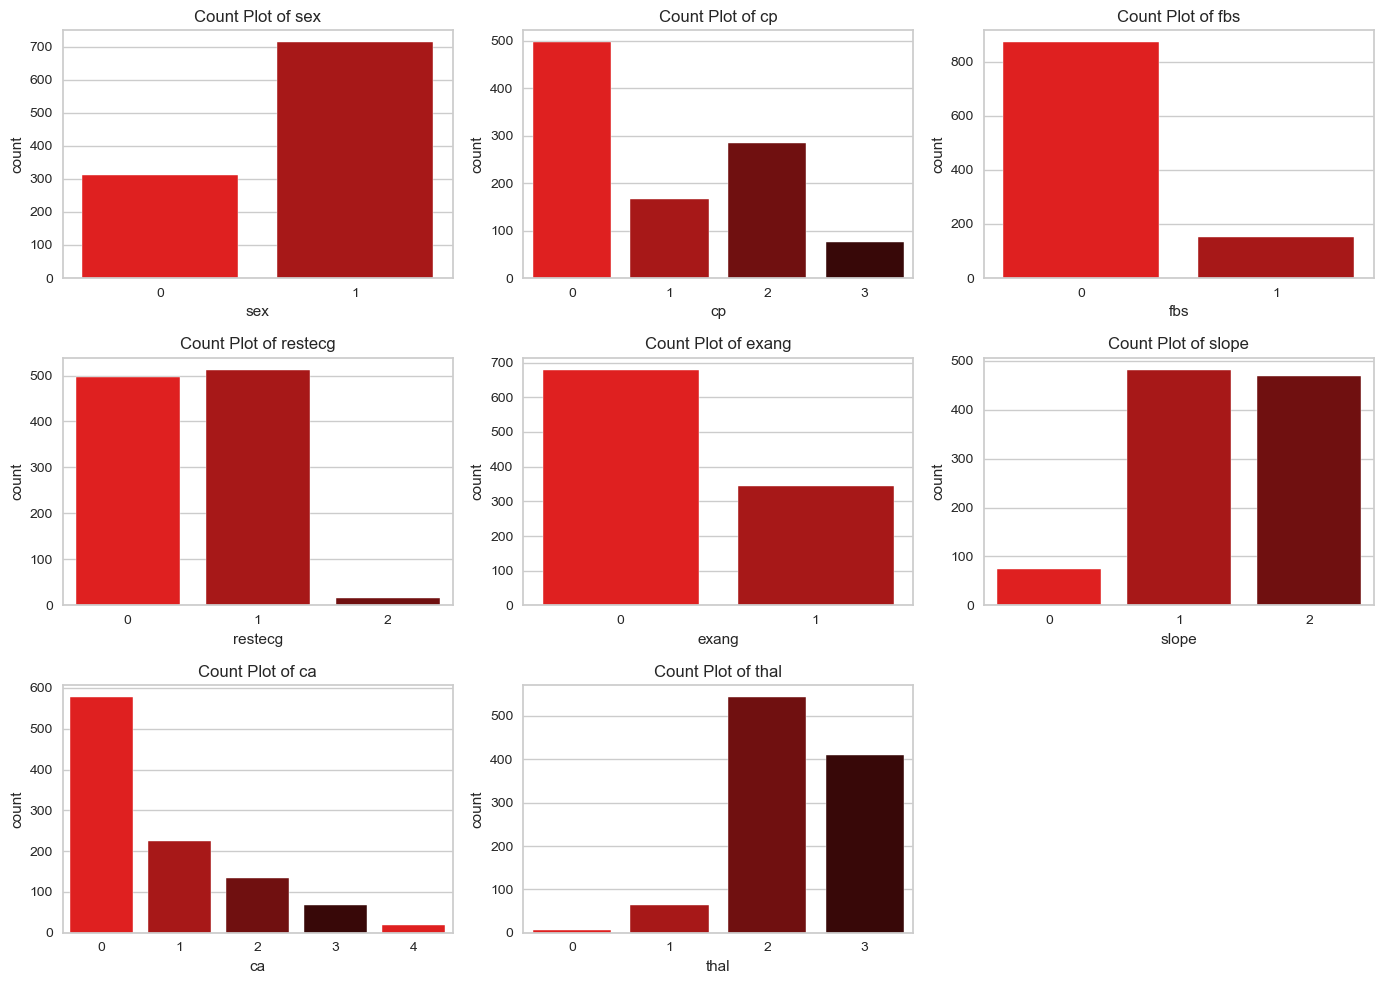

In [118]:
plt.figure(figsize = (14,10))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df, x = col, palette= red_grad[0:4] )
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

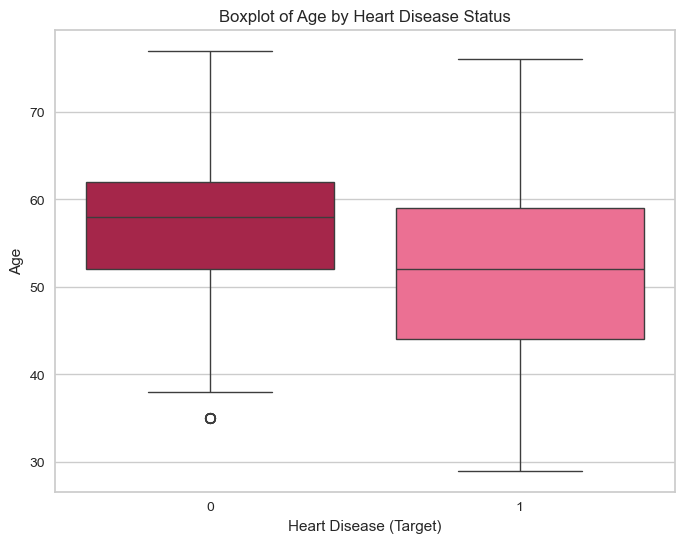

In [119]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'target',y = 'age', palette = pink_grad[1:3])
plt.title("Boxplot of Age by Heart Disease Status")
plt.xlabel("Heart Disease (Target)")
plt.ylabel("Age")
plt.show()

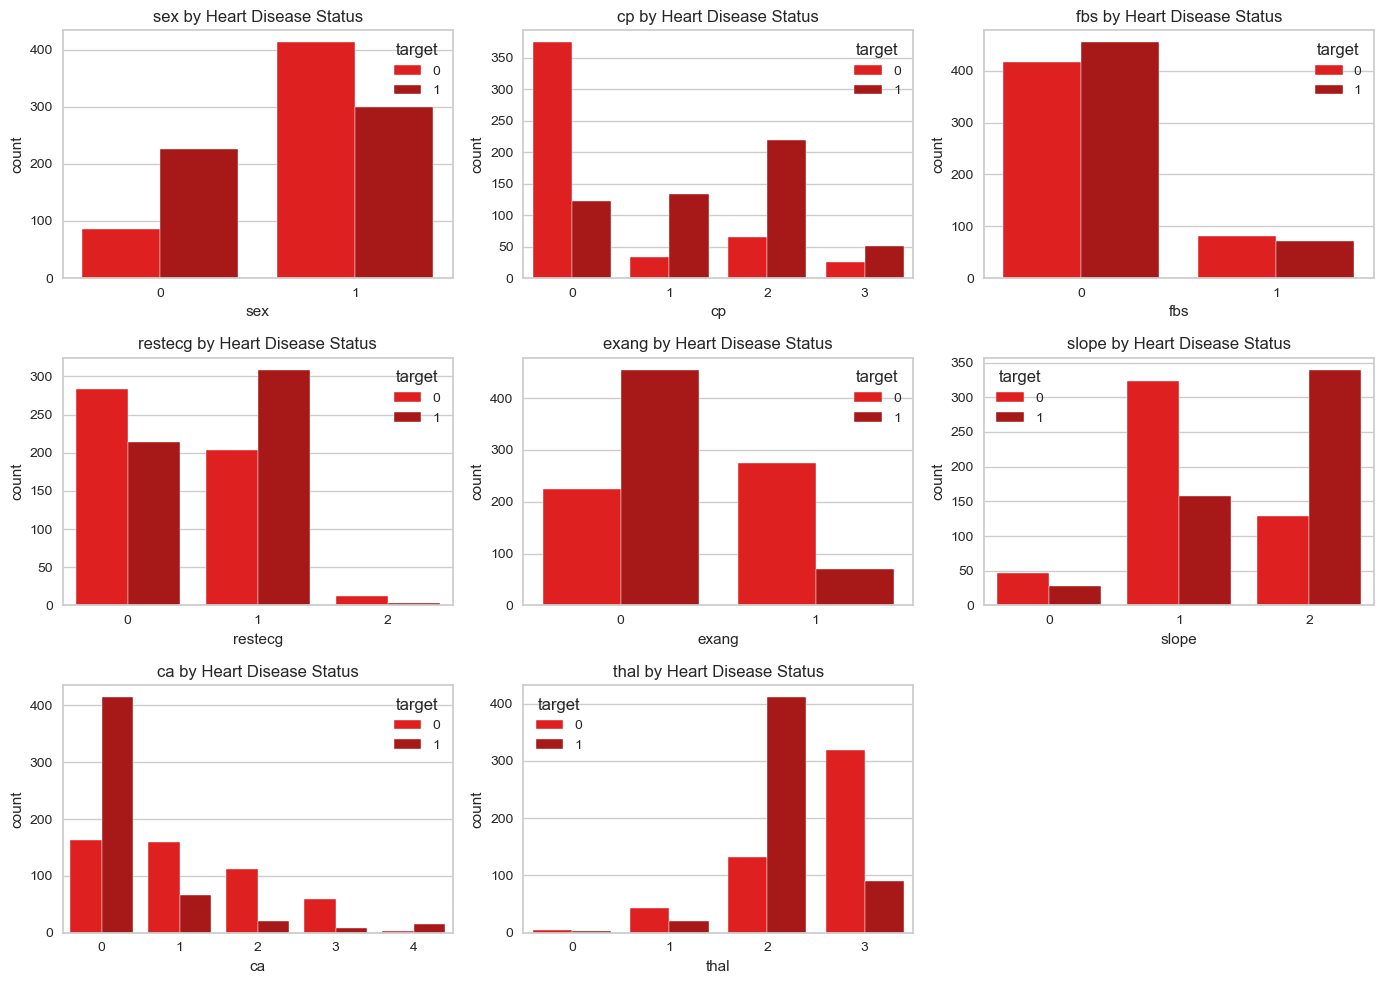

In [120]:
plt.figure(figsize = (14,10))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df, x = col,hue='target', palette= red_grad[0:3])
    plt.title(f"{col} by Heart Disease Status")
plt.tight_layout()
plt.show()

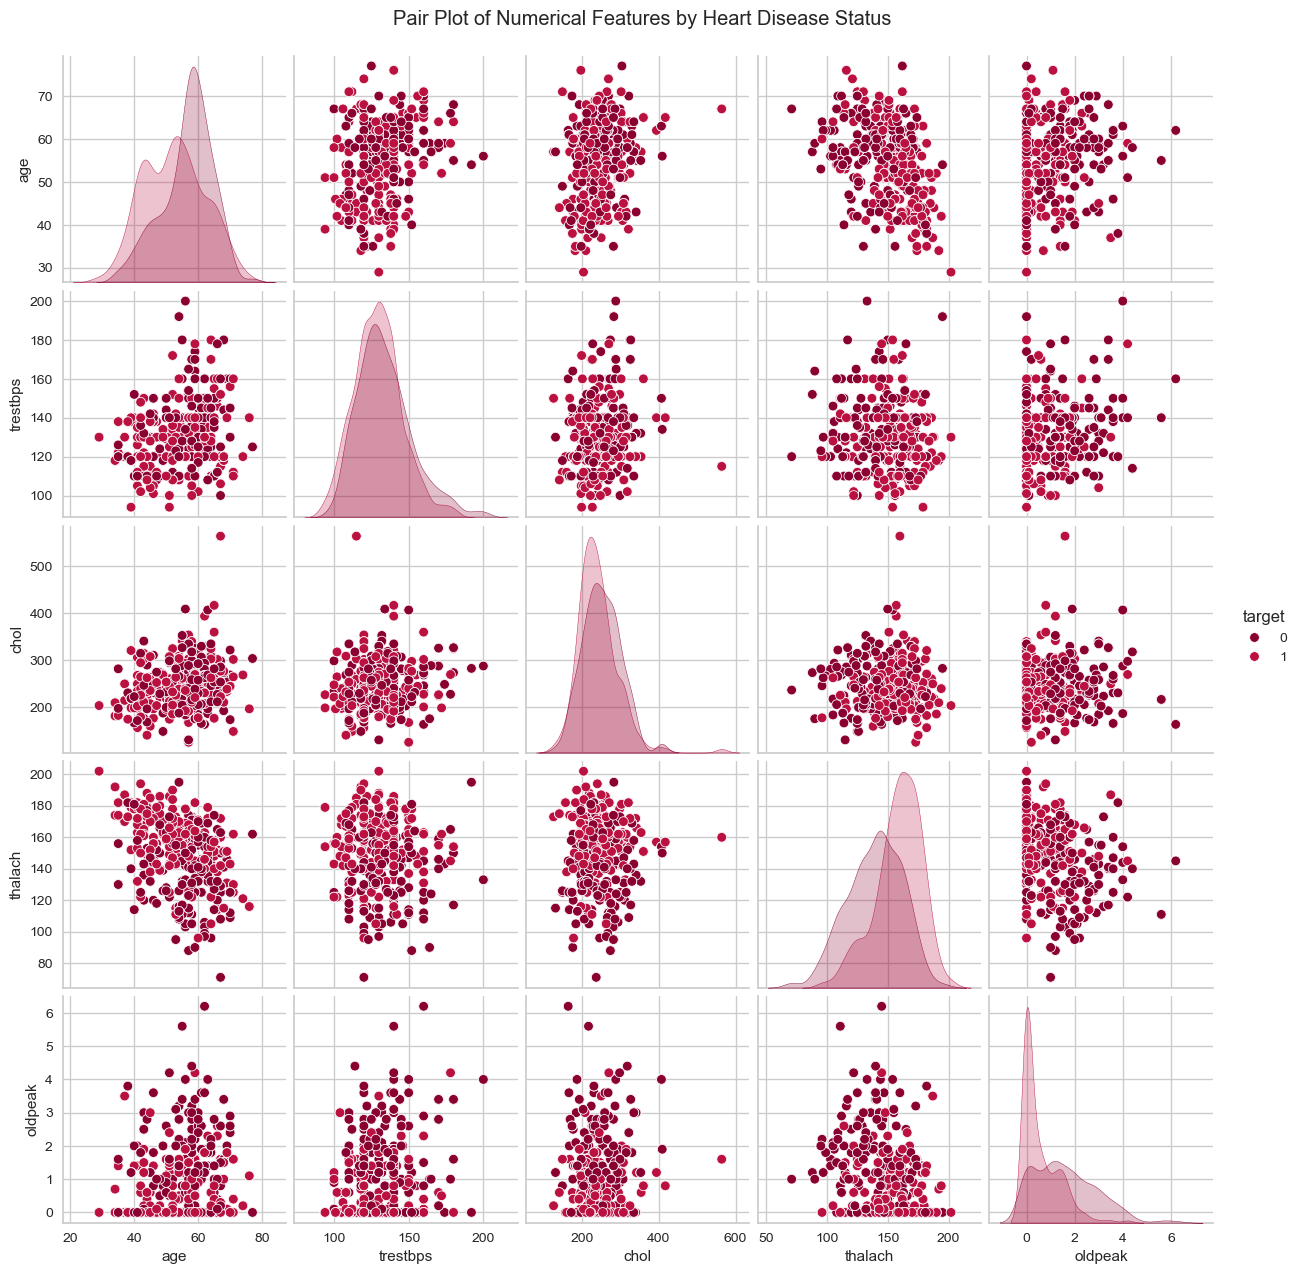

In [121]:
sns.pairplot(df,vars = numerical_features,hue = 'target',palette = pink_grad[0:2])
plt.suptitle("Pair Plot of Numerical Features by Heart Disease Status", y = 1.02)
plt.show()

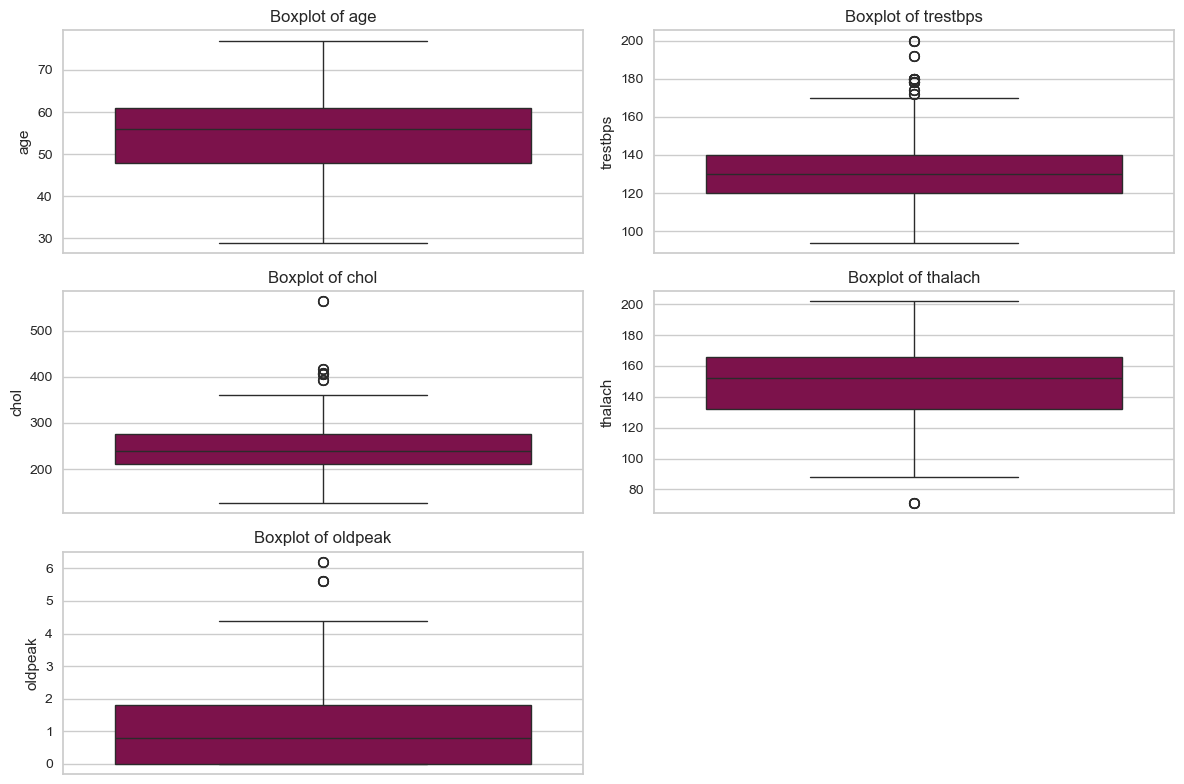

In [122]:
plt.figure(figsize=(12,8))
for i , col in enumerate(numerical_features,1):
    plt.subplot(3,2,i)
    sns.boxplot(data = df, y = col, palette = purple_grad[2:3])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Distribution based on Gender 💉👫</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on gender.
</div>

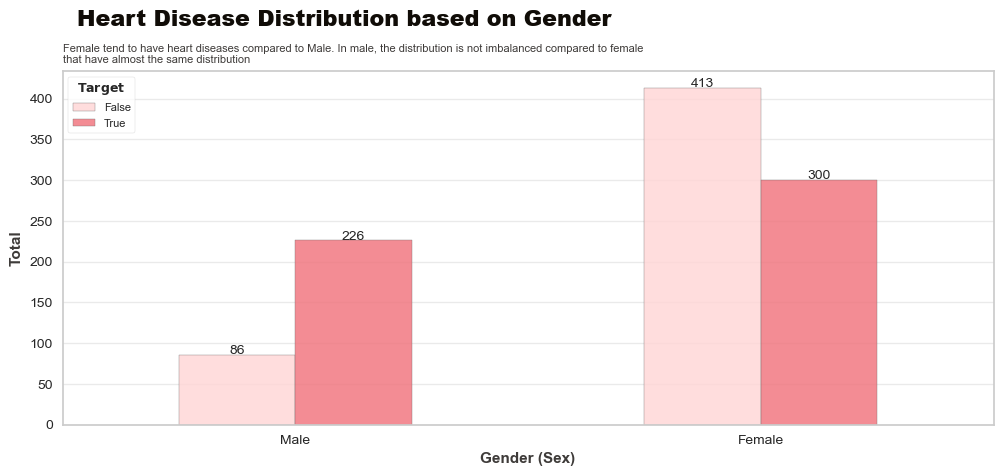

In [123]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0,1])
label_genders = ['Male','Female']

# --- Creating Bar chart
ax = pd.crosstab(df.sex,df.target).plot(kind = 'bar', figsize = (10,5),
                                        color = color_mix[2:4],
                                        edgecolor = black_grad[2] , alpha = 0.85)

# --- Bar Chart Settings ---
for rect in ax.patches :
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 1.25 , rect.get_height(),
             horizontalalignment = 'center' , fontsize = 10)
    
plt.suptitle('Heart Disease Distribution based on Gender' , fontweight = 'heavy',
            x = 0.065, y = 0.98 , ha ='left' , fontsize = '16' , fontfamily = 'sans-serif',
            color = black_grad[0])

plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution',
          fontsize = '8' , fontfamily = 'sans-serif' , loc = 'left', color = black_grad[1])
plt.tight_layout(rect=[0,0.04,1,1.025])
plt.xlabel('Gender (Sex)' , fontfamily = 'sans-serif' , fontweight = 'bold',
           color = black_grad[1])
plt.ylabel('Total' , fontfamily = 'sans-serif' , fontweight = 'bold' , 
           color = black_grad[1])
plt.xticks(label_gender,label_genders,rotation = 0)
plt.grid(axis = 'y' , alpha = 0.4)
plt.grid(axis = 'x' , alpha = 0)
plt.legend(labels = labels , title = '$\\bf{Target}$' , fontsize = '8',
           title_fontsize = '9' , loc = 'upper left' , frameon = True)


## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Heart Disease Distribution based on Major Vessels Total 💉💖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on number of major vessels.
</div>

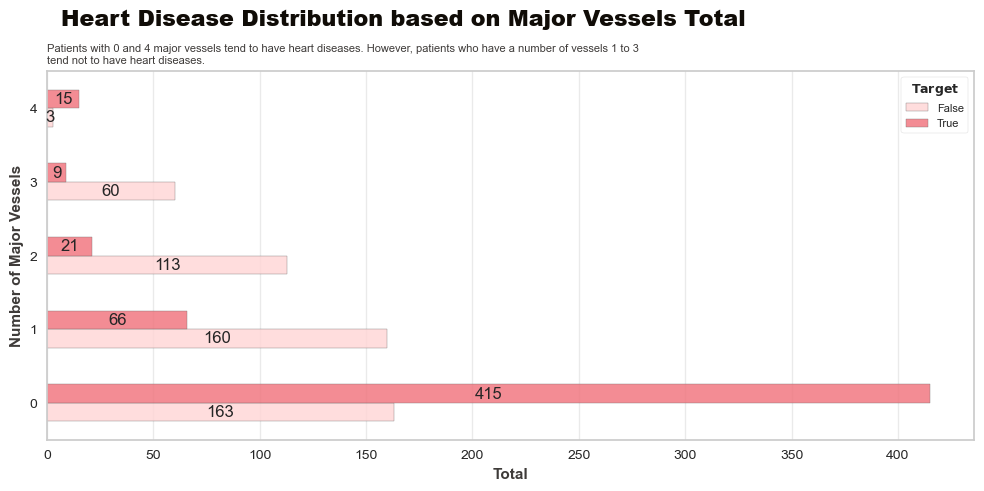

In [124]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(10, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Scatter Plot based on Age 💉👴</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show <b>scatter plot</b> of patients with heart diseases based on age.
</div>

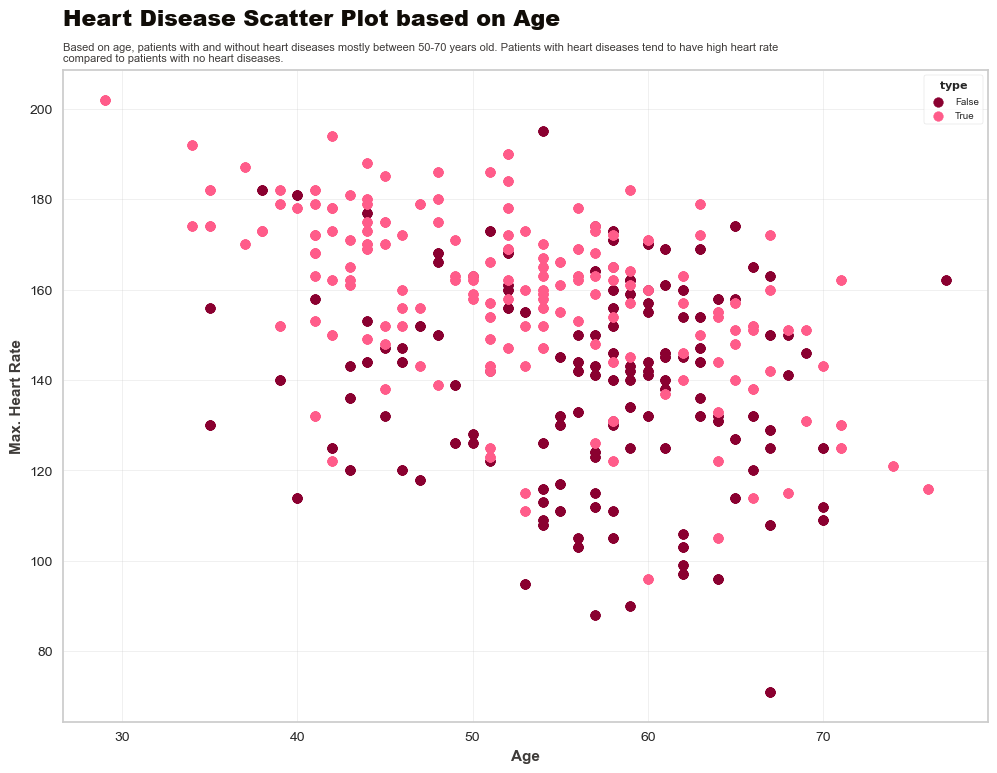

In [125]:
# -- Scatter Plot Size & Tiles Settings ---
plt.figure(figsize=(10,8))
plt.suptitle('Heart Disease Scatter Plot based on Age' , fontweight = 'heavy', 
             x = 0.048, y = 0.98, ha ='left', fontsize = '16' , fontfamily = 'sans-serif', 
             color = black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.',
          fontsize = '8' , fontfamily = 'sans-serif' , loc = 'left' , color = black_grad[1])
plt.tight_layout(rect=[0,0.04,1,1.01])

# --- Creating Scatter Plot ---
plt.scatter(x = df.age[df.target == 0], y = df.thalach[(df.target == 0)], c= pink_grad[0])
plt.scatter(x = df.age[df.target == 1] , y = df.thalach[(df.target == 1)] , c= pink_grad[2])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False' , 'True'] , title = '$\\bf{type}$' , fontsize = '7',
           title_fontsize = '8', loc = 'upper right' , frameon = True)
plt.xlabel('Age' , fontweight = 'bold' , fontsize = '11' , 
           fontfamily = 'sans-serif' , color = black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight = 'bold' , fontsize = '11', 
           fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain' , axis = 'both')
plt.grid(axis = 'both' , alpha = 0.4 , lw = 0.5)
plt.show()

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heatmap 🔥</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Below is <b>correlation map/heatmap of numerical variables</b> to show correlation level/values for each variables with others.
</div>

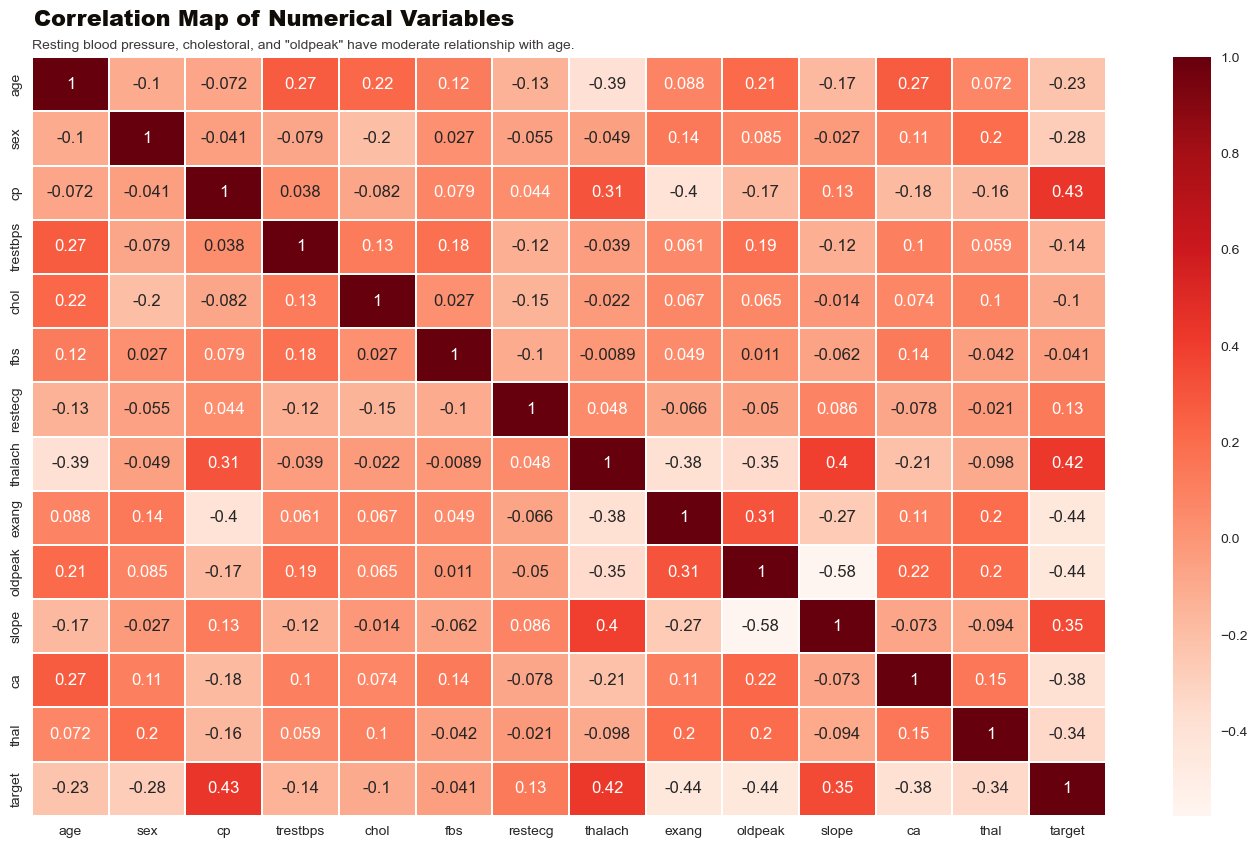

In [126]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize =(14,9))
sns.heatmap(df.corr(), annot = True , cmap = 'Reds' , linewidths = 0.1)
plt.suptitle('Correlation Map of Numerical Variables' , fontweight = 'heavy',
             x = 0.03 , y = 0.98, ha = 'left' , fontsize = '16', fontfamily = 'sans-serif' , 
             color = black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.',
         fontsize = '10', fontfamily = 'sans-serif' , loc = 'left' , color = black_grad[1])
plt.tight_layout(rect=[0,0.04,1,1.01])

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Dataset Pre-processing ⚙</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>prepare the dataset</b> before building the machine learning models.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> One-Hot Encoding 🔧</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The data pre-processing will be transforming categorical variables using <b>one-hot encoding technique</b>.
</div>

In [141]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [142]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Dropping Unnecessary Variables 🔻 </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The <b>variables that unnecessary will be deleted</b>.
</div>

In [143]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [145]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'})

# <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Outliers</div>


In [146]:
outlier_columns = []
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outlier_columns.append(col)

print("Columns with potential outliers:",outlier_columns)
print(df.shape) 

Columns with potential outliers: ['oldpeak']
(964, 22)


In [147]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    

In [148]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64


In [149]:
corr = df.corr()
print(corr['target'].sort_values(ascending = False))

target      1.000000
thal_2      0.527503
thalach     0.424230
slope_2     0.373264
cp_2        0.306418
cp_1        0.262130
restecg     0.174880
cp_3        0.069454
thal_0     -0.017168
slope_0    -0.040956
fbs        -0.041217
thal_1     -0.092337
trestbps   -0.108055
chol       -0.123497
age        -0.229143
sex        -0.316542
slope_1    -0.354440
ca         -0.370640
exang      -0.435499
oldpeak    -0.443795
thal_3     -0.490893
cp_0       -0.511295
Name: target, dtype: float64


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">Features Separating ➗</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In this section, <mark><b>the 'target' (dependent) column will be seperated</b></mark> from independent columns.
</div>

In [150]:
# --- Seperating Dependent Features ---
X = df.drop(['target'], axis = 1)
y = df['target']

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Data Normalization ⚖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In this section, data normalization will be performed to <mark><b>normalize the range of independent variables</b></mark> or features of data.<br>
    👉 Data normalization will use <mark><b>min-max normalization</b></mark>.
    <blockquote style="font-size: 12px; color: #000000;">
    📌 <b>Min-max normalization</b> is often known as feature scaling where <mark><b>the values of a numeric range of a feature of data, are reduced to a scale between 0 and 1</b></mark>.
    </blockquote>
</div>

In [151]:
# --- Data Normalization using Min-Max Method ---
X = MinMaxScaler().fit_transform(X)

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Splitting the Dataset 🪓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The dataset will be splitted into <mark><b>80:20 ratio</b></mark> (80% training and 20% testing).
</div>

In [158]:
# --- Splitting Dataset into 80:20 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Model Implementation 🛠</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will implement various machine learning models as mentioned in <b>Introduction</b> section. In addition, explanation for each models will be discussed.
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Logistic Regression</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Logistic regression</b></mark> is a statistical method that is used for building machine learning models where <b>the dependent variable is dichotomous: i.e. binary</b>. Logistic regression is used to describe data and <b>the relationship between one dependent variable and one or more independent variables</b>. The independent variables can be nominal, ordinal, or of interval type.<br><br>
    The name "logistic regression" is derived from the concept of the logistic function that it uses. <b>The logistic function is also known as the sigmoid function</b>. The value of this logistic function lies between zero and one.<br><br>
    <center>
    <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%"><br>
    <i>🖼 Logistic Function by Simplilearn</i>
    </center>
    </blockquote>
</div>

In [159]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
lr_pred = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test,lr_pred)

print(f'train score {logistic_model.score(X_train,y_train)}')
print(f'test score {logistic_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,lr_pred))
print("\nClassification Report:\n", classification_report(y_test,lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,lr_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':lr_pred})

train score 0.85546875
test score 0.8652849740932642
Accuracy: 0.8652849740932642

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        85
           1       0.87      0.90      0.88       108

    accuracy                           0.87       193
   macro avg       0.87      0.86      0.86       193
weighted avg       0.87      0.87      0.86       193


Confusion Matrix:
 [[70 15]
 [11 97]]


True_values  pred_values
369            1            1
409            0            1
376            1            1
830            1            1
300            1            1
..           ...          ...
593            0            0
36             1            1
34             1            1
767            0            0
712            1            1

[193 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression -87% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> K-Nearest Neighbour (KNN)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>The k-nearest neighbors (KNN)</b></mark> algorithm is a data classification method <b>for estimating the likelihood that a data point will become a member of one group or another</b> based on what group the data points nearest to it belong to.<br><br>
    The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used <b>to solve classification and regression problems</b>.<br><br>
    It's called a <b>lazy learning algorithm or lazy learner</b> because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.</b></mark>.<br><br>
    <center>
    <img src="https://1.bp.blogspot.com/-D6REhf2XBwQ/XZcWn0cwSEI/AAAAAAAAAvs/LUCN8jxvzcMjkkDK4FAXSuR7MBDW8SBJgCLcBGAsYHQ/s1600/KNN_final_a1mrv9.jpg" alt="KNN" width="35%"><br>
    <i>🖼 KNN by Kita Informatika</i>
    </center>
    </blockquote>
</div>

In [160]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test,knn_pred)

print(f'train score {knn_model.score(X_train,y_train)}')
print(f'test score {knn_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,knn_pred))
print("\nClassification Report:\n", classification_report(y_test,knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,knn_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':knn_pred})

train score 0.9401041666666666
test score 0.8290155440414507
Accuracy: 0.8290155440414507

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        85
           1       0.86      0.82      0.84       108

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193


Confusion Matrix:
 [[71 14]
 [19 89]]


True_values  pred_values
369            1            0
409            0            0
376            1            1
830            1            1
300            1            1
..           ...          ...
593            0            0
36             1            1
34             1            1
767            0            0
712            1            1

[193 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNearest Neighbors - 83% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Grid Search KNN</div>

In [166]:
knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors' : [5,6,7,8,9,10,11,12,13,20]}

In [168]:
grid_search = GridSearchCV(estimator=knn_model, param_grid = param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 20]})

In [169]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 7}
Best Score:  0.8425176131058485


In [170]:
knn_grid_model = grid_search.best_estimator_
knn_grid_pred = knn_grid_model.predict(X_test)
knn_grid_accuracy = accuracy_score(y_test,knn_grid_pred)
print("Test Accuracy: ",accuracy_score(y_test,knn_grid_pred))

Test Accuracy:  0.8497409326424871


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Support Vector Machine (SVM)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Support Vector Machine (SVM)</b></mark> is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.<br><br>
    The goal of the SVM algorithm is <b>to create the best line or decision boundary that can segregate n-dimensional space into classes</b> so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.<br><br>
        SVM chooses the <b>extreme points/vectors</b> that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.<br>
    <center>
    <img src="https://d2jdgazzki9vjm.cloudfront.net/tutorial/machine-learning/images/support-vector-machine-algorithm.png" alt="SVM" width="40%"><br>
    <i>🖼 SVM by JavaTPoint</i>
    </center>
    </blockquote>
</div>

In [161]:
# Initialize and train the SVM model
svm_model = SVC(kernel = 'rbf', random_state=42)
svm_model.fit(X_train,y_train)

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test,svm_pred)

print(f'train score {svm_model.score(X_train,y_train)}')
print(f'test score {svm_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,svm_pred))
print("\nClassification Report:\n", classification_report(y_test,svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,svm_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':svm_pred})

train score 0.8971354166666666
test score 0.9015544041450777
Accuracy: 0.9015544041450777

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89        85
           1       0.92      0.91      0.91       108

    accuracy                           0.90       193
   macro avg       0.90      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193


Confusion Matrix:
 [[76  9]
 [10 98]]


True_values  pred_values
369            1            1
409            0            0
376            1            1
830            1            1
300            1            1
..           ...          ...
593            0            0
36             1            1
34             1            1
767            0            0
712            1            1

[193 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | SVM - 90% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: rgb(92, 149, 255); color: #FFFFFF; padding: 12px; line-height: 1.5;">Artificial Neural Network (ANN)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Artificial Neural Network (ANN)</b></mark> <span> contain artificial neurons, which are called </span><b><strong>units</strong></b><span>. These units are arranged in a series of layers that together constitute the whole </span><b><strong>Artificial Neural Network</strong></b><span> in a system. A layer can have only a dozen units or millions of units</span><b><strong>,</strong></b><span> as this depends on how the complex neural networks will be required to learn the hidden patterns in the dataset. Commonly, </span><b><strong>an </strong></b><span>Artificial Neural Network has an input layer, an output layer, as well as hidden layers. The input layer receives data from the outside world</span><b><strong>,</strong></b><span> which the neural network needs to analyze or learn about. Then, this data passes through one or multiple hidden layers that transform the input into data that is valuable for the output layer. Finally, the output layer provides an output in the form of a response of the </span><b><strong>Artificial Neural Networks </strong></b><span>to the input data provided. </span>
    <span>
    In the majority of neural networks, units are interconnected from one layer to another. Each of these connections has weights that determine the influence of one unit on another unit. As the data transfers from one unit to another, the neural network learns more and more about the data, which eventually results in an output from the output layer. 
    </span>
    <center>
    <img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png" alt="ANN" width="35%"><br>
    <i>🖼 ANN by geeksforgeeks</i>
    </center>
    </blockquote>
</div>

In [171]:
ann_model = MLPClassifier(hidden_layer_sizes = (100,50), max_iter = 500, random_state = 42)
ann_model.fit(X_train,y_train)

# Make predictions and evaluate 
mlp_predictions = ann_model.predict(X_test)

ann_accuracy = accuracy_score(y_test,mlp_predictions)

print(f'train score {ann_model.score(X_train,y_train)}')
print(f'test score {ann_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,mlp_predictions))
print("\nClassification Report:\n", classification_report(y_test,mlp_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,mlp_predictions))
pd.DataFrame({'True_values':y_test, 'pred_values':mlp_predictions})



train score 1.0
test score 0.9844559585492227
Accuracy: 0.9844559585492227

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        85
           1       1.00      0.97      0.99       108

    accuracy                           0.98       193
   macro avg       0.98      0.99      0.98       193
weighted avg       0.98      0.98      0.98       193


Confusion Matrix:
 [[ 85   0]
 [  3 105]]


True_values  pred_values
369            1            1
409            0            0
376            1            1
830            1            1
300            1            1
..           ...          ...
593            0            0
36             1            1
34             1            1
767            0            0
712            1            1

[193 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | ANN - 98% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Decision Tree</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Decision Tree</b></mark> is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where <b>internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome</b>.<br><br>
    In a Decision tree, there are <b>two nodes</b>, which are the <mark><b>Decision Node and Leaf Node</b></mark>. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.<br>
    <center>
    <img src="https://www.tutorialspoint.com/machine_learning/images/decision_tree_algorithm.jpg" alt="DT" width="35%"><br>
    <i>🖼 Decision Tree by Javatpoint</i>
    </center>
    </blockquote>
</div>

In [163]:
dtc_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5 , criterion = 'entropy' , min_samples_split = 5,
                                   splitter = 'random' , random_state = 1)
dtc_model.fit(X_train , y_train)
dtc_pred = dtc_model.predict(X_test)

dtc_accuracy = accuracy_score(y_test,dtc_pred)

print(f'train score {dtc_model.score(X_train,y_train)}')
print(f'test score {dtc_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,dtc_pred))
print("\nClassification Report:\n", classification_report(y_test,dtc_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,dtc_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':dtc_pred})

train score 0.8502604166666666
test score 0.8601036269430051
Accuracy: 0.8601036269430051

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        85
           1       0.89      0.85      0.87       108

    accuracy                           0.86       193
   macro avg       0.86      0.86      0.86       193
weighted avg       0.86      0.86      0.86       193


Confusion Matrix:
 [[74 11]
 [16 92]]


True_values  pred_values
369            1            1
409            0            1
376            1            1
830            1            1
300            1            1
..           ...          ...
593            0            0
36             1            1
34             1            1
767            0            0
712            1            1

[193 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Decision Tree- 86% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">Random Forest</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Random Forest</b></mark> is a tree-based machine learning algorithm that <b>leverages the power of multiple decision trees for making decisions</b>. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. <b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models</b>.<br>
    <center>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" alt="RF" width="35%"><br>
    <i>🖼 Random Forest by Abhishek Sharma</i>
    </center>
    </blockquote>
</div>

In [181]:
rf_model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)

print(f'train score {rf_model.score(X_train,y_train)}')
print(f'test score {rf_model.score(X_test,y_test)}')
print("Accuracy:",accuracy_score(y_test,rf_pred))
print("\nClassification Report:\n", classification_report(y_test,rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,rf_pred))
pd.DataFrame({'True_values':y_test, 'pred_values':rf_pred})

train score 1.0
test score 1.0
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       108

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193


Confusion Matrix:
 [[ 85   0]
 [  0 108]]


True_values  pred_values
369            1            1
409            0            0
376            1            1
830            1            1
300            1            1
..           ...          ...
593            0            0
36             1            1
34             1            1
767            0            0
712            1            1

[193 rows x 2 columns]

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest - 100% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">Grid Search Random Forest</div>

In [172]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4] ,
    'max_features' : ['auto','sqrt','log2'],
    'bootstrap' : [True,False]
}

In [174]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs= -1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [175]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.99219930396401


In [176]:
rf_grid_model = grid_search.best_estimator_
rf_grid_pred = rf_grid_model.predict(X_test)
rf_grid_accuracy = accuracy_score(y_test,rf_grid_pred)
print("Test Accuracy: ",accuracy_score(y_test,rf_grid_pred))

Test Accuracy:  1.0


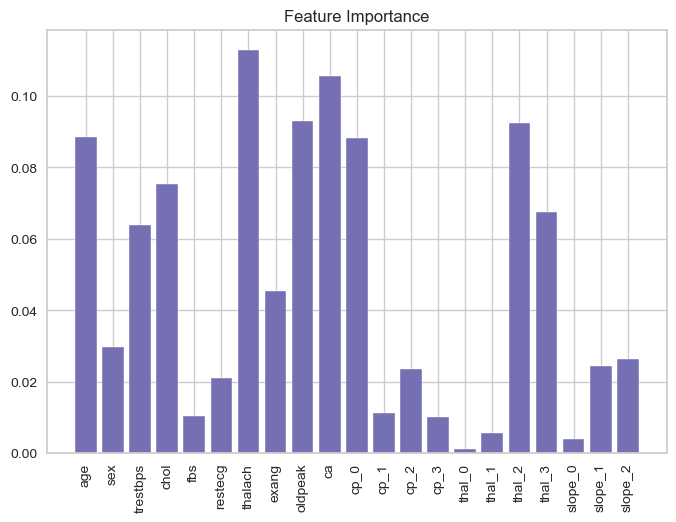

In [177]:
importance = rf_grid_model.feature_importances_
plt.bar(df.drop('target',axis = 1).columns, importance)
plt.title("Feature Importance")
plt.xticks(rotation = 90)
plt.show()

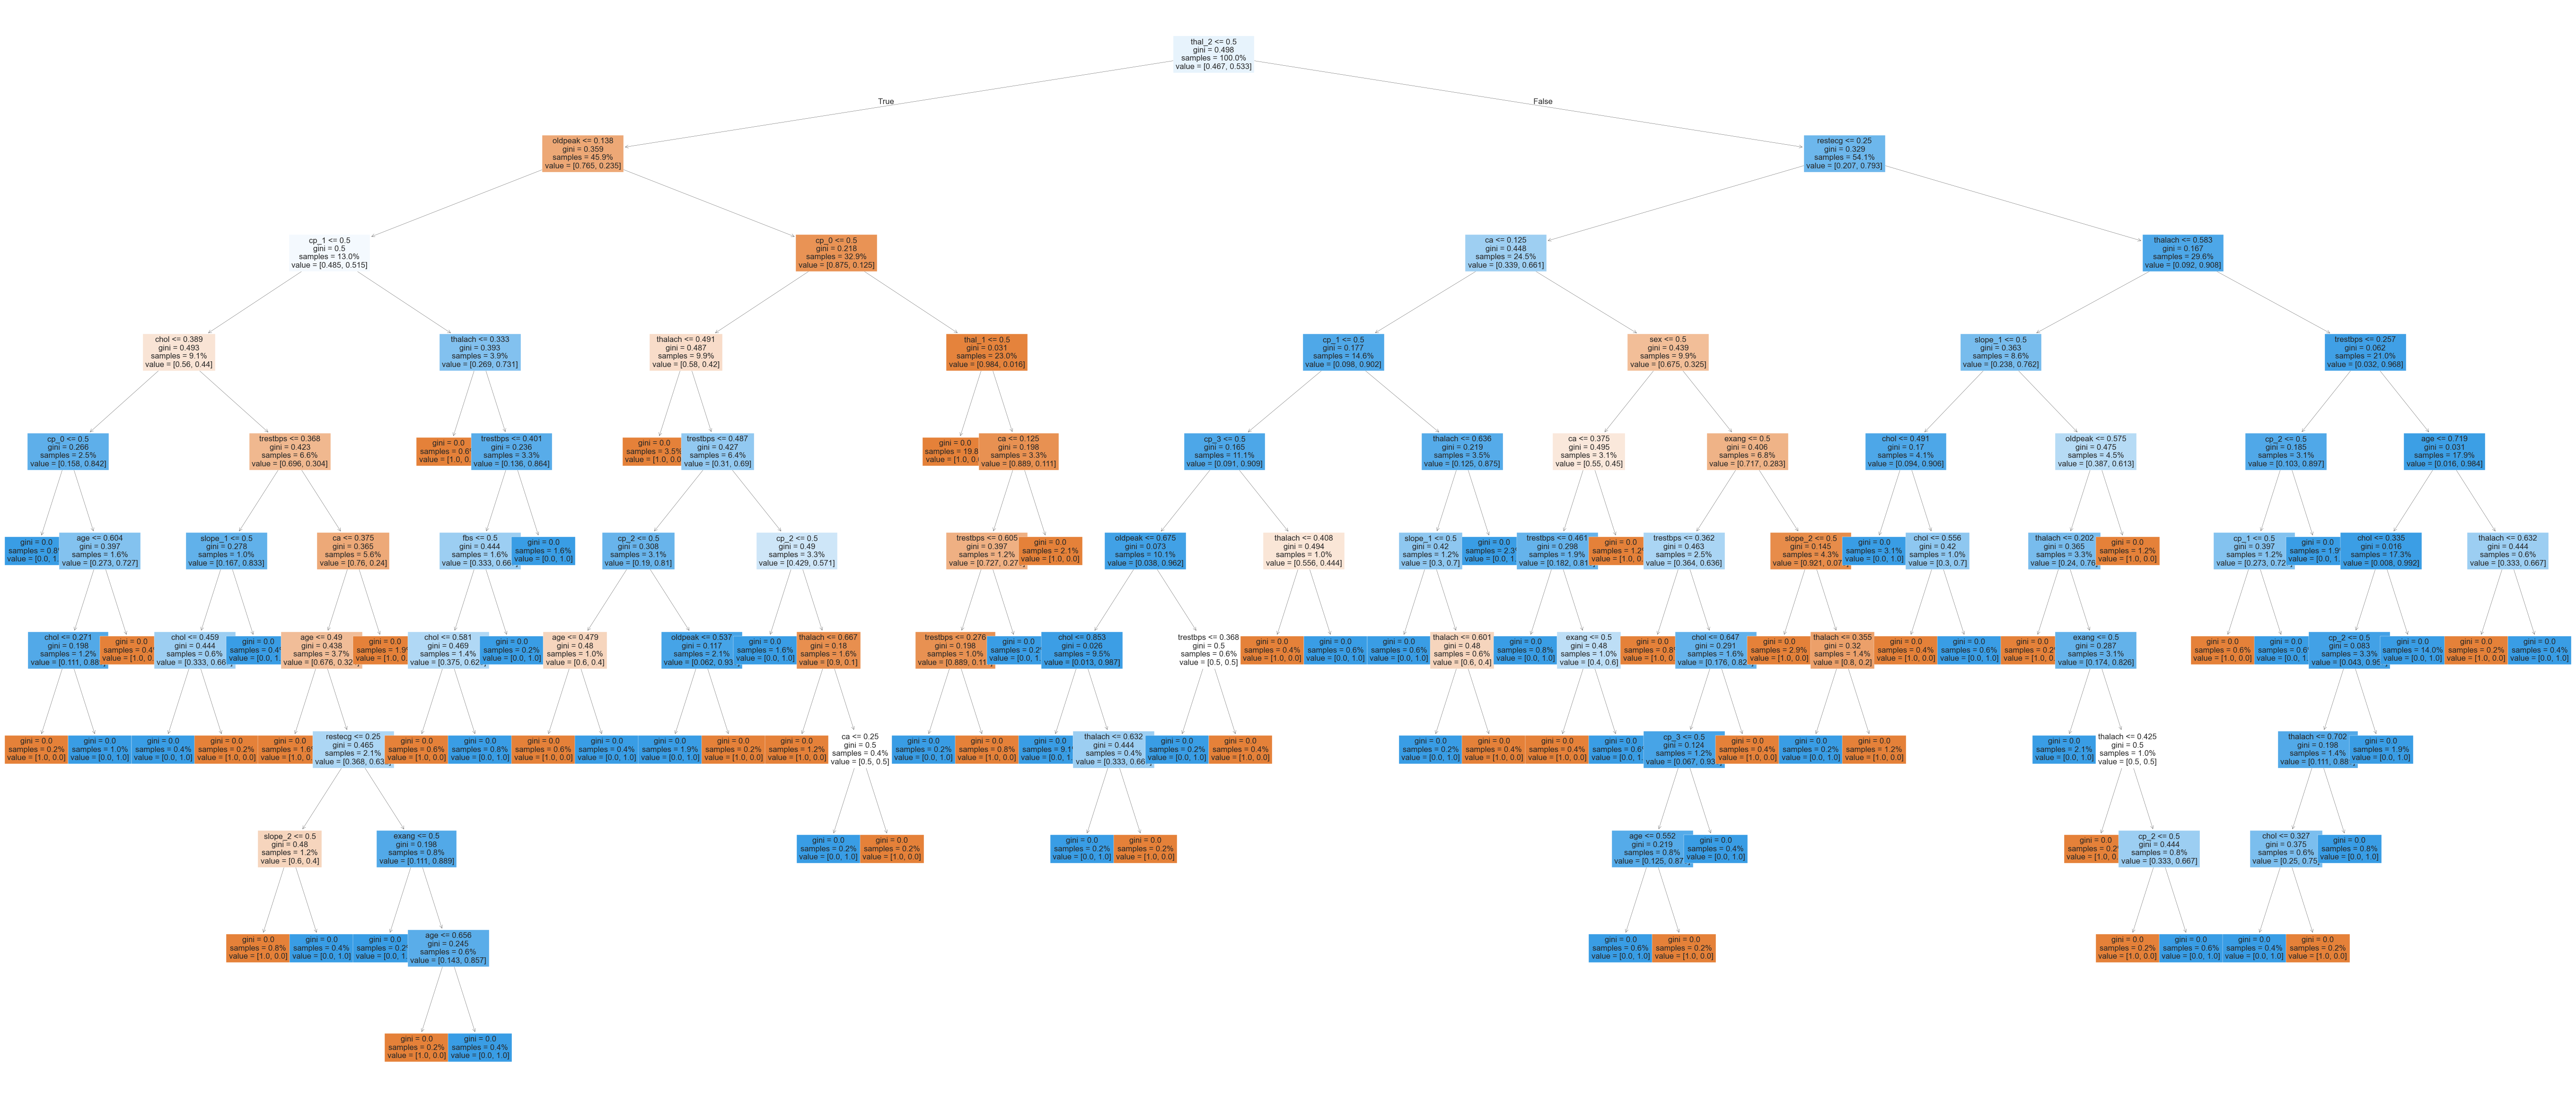

In [178]:
plt.figure(figsize = (70,30))
plot_tree(rf_grid_model.estimators_[0], feature_names = df.drop(['target'],axis = 1).columns, filled = True, fontsize = 12 , proportion= True)
plt.show()

## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Model Comparison 👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After implementing 10 models, this section will <b>compare machine learning models</b>.
</div>

In [182]:
# Store model names and accuracies in lists 
model_names = [ 'knn_model','knn_grid_model','dtc_model','logistic_model'
               'svm_model', 'ann_model', 'rf_model', 'rf_grid_model']

accuracies = [knn_accuracy,knn_grid_accuracy, dtc_accuracy , logistic_accuracy,
              svm_accuracy, ann_accuracy, rf_accuracy, rf_grid_accuracy]

# Plot with Plotly
fig = go.Figure(data = [go.Bar(x = model_names , y = accuracies, text = [f"{acc:.2f}" for acc in accuracies],
                              textposition='auto', marker_color = 'skyblue')])

# Add titles 
fig.update_layout(title="Model Accuracy Comparison",
                  xaxis_title="Models", yaxis_title="Accuracy",
                  template="plotly_white")

# Show the plot
fig.show()

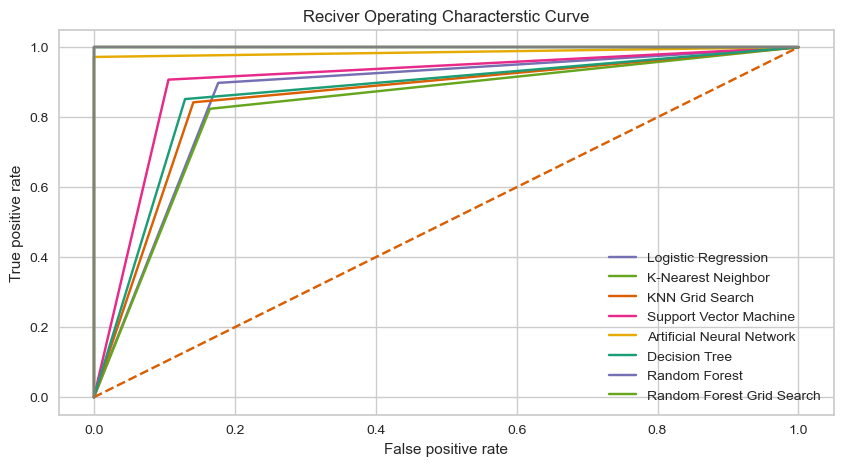

In [184]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_pred)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_pred)
knn_grid_false_positive_rate,knn_grid_true_positive_rate,knn_grid_threshold = roc_curve(y_test,knn_grid_pred)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_pred)
ann_false_positive_rate,ann_true_positive_rate,ann_threshold = roc_curve(y_test,mlp_predictions)
dtc_false_positive_rate,dtc_true_positive_rate,dtc_threshold = roc_curve(y_test,dtc_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_pred)
rf_grid_false_positive_rate,rf_grid_true_positive_rate,rf_grid_threshold = roc_curve(y_test,rf_grid_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(knn_grid_false_positive_rate,knn_grid_true_positive_rate,label='KNN Grid Search')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='Support Vector Machine')
plt.plot(ann_false_positive_rate,ann_true_positive_rate,label='Artificial Neural Network')
plt.plot(dtc_false_positive_rate,dtc_true_positive_rate,label='Decision Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(rf_grid_false_positive_rate,rf_grid_true_positive_rate,label='Random Forest Grid Search')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

<div style='font-size:200%;'>
    <a id='import'></a>
    <h3 style='color: orange; font-weight: bold; font-family: Cascadia code;'>
        <center> Alright, that's it folks, Thank you for the visit! </center>
    </h3>
</div>